# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**
<br>
A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high-earning customers. Banks are afraid of defaulters, as bad loans (NPL) usually eat up their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.
<br>

The approval process for the loans is multifaceted. Through this process, the bank tries to check the creditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases.

* Accurate loan default prediction is crucial for banks or financial institutions to manage credit risk, making informed lending decisions, allocating resources efficiently, and minimize financial losses (rejecting customers whol will default on loan before approval). Solving this problem can have significant benefits for the whole economy not just for banks.

### **The objective:**

* Build a classication model to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan.

### **The key questions:**

* What are the important metrics to consider for evaluating model performance, such as accuracy, recall, precision, and F1 score, and why are they relevant for the loan prediction problem?


* How do different techniques, such as logistic regression, decision tree, random forest, boosting models, and k-nearest neighbors, perform in terms of predictive accuracy and interpretability?


* Which technique is performing relatively better in terms of both model performance and interpretability, and why? What are the strengths and limitations of each technique in the context of the loan prediction problem?


* Is there scope to further improve the performance of the chosen model, and if so, what techniques or strategies can be employed to achieve that?


* Which variables or features are significant in predicting the target variable (loan default) based on the chosen model? Do these variables align with the domain knowledge and business context of the loan prediction problem?


* Do the variables continue to be significant post-modeling, or do their importance change? Are there any insights or patterns observed in the data that are relevant to the loan prediction problem and can provide meaningful insights to the stakeholders, such as the bank?

### **The problem formulation**:

* Using data science, we are trying to solve this problem by develop accurate and effective predictive models that can analyze historical data, identify patterns, and make predictions about whether a borrower is likely to default on their loan in the future.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="tab10")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
sns.set(context='notebook', style='whitegrid', palette='tab10', font='sans-serif', font_scale=1, rc=None)

import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
hm=pd.read_csv("hmeq.csv")

## Summary Statistics

In [3]:
df=hm.copy()
df.head().T

,0,1,2,3,4
BAD,1,1,1,1,0
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860.0,70053.0,13500.0,NaN,97800.0
VALUE,39025.0,68400.0,16700.0,NaN,112000.0
REASON,HomeImp,HomeImp,HomeImp,NaN,HomeImp
JOB,Other,Other,Other,NaN,Office
YOJ,10.5,7.0,4.0,NaN,3.0
DEROG,0.0,0.0,0.0,NaN,0.0
DELINQ,0.0,2.0,0.0,NaN,0.0
CLAGE,94.366667,121.833333,149.466667,NaN,93.333333


In [4]:
df.tail().T

,5955,5956,5957,5958,5959
BAD,0,0,0,0,0
LOAN,88900,89000,89200,89800,89900
MORTDUE,57264.0,54576.0,54045.0,50370.0,48811.0
VALUE,90185.0,92937.0,92924.0,91861.0,88934.0
REASON,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon
JOB,Other,Other,Other,Other,Other
YOJ,16.0,16.0,15.0,14.0,15.0
DEROG,0.0,0.0,0.0,0.0,0.0
DELINQ,0.0,0.0,0.0,0.0,0.0
CLAGE,221.808718,208.69207,212.279697,213.892709,219.601002


### The shape of data

In [5]:
df.shape

(5960, 13)

* The dataset has **5960 rows and 13 columns.**

### Checking for data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations:**
* Only **REASON and JOB** are object type while the rest of the columns are numeric type.
* There is **no null values in BAD and LOAN**.

### Checking for missing value

In [7]:
df.isnull()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,False,False,False,False,False,False,False,False,False,False,False,False
5956,False,False,False,False,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
percent_missing = df.isnull().sum()*100/len(df)
print(percent_missing.sort_values())

BAD         0.000000
LOAN        0.000000
VALUE       1.879195
CLNO        3.724832
REASON      4.228188
JOB         4.681208
CLAGE       5.167785
NINQ        8.557047
YOJ         8.640940
MORTDUE     8.691275
DELINQ      9.731544
DEROG      11.879195
DEBTINC    21.258389
dtype: float64


**Observations:**
* There are missing values in the dataset.

* The missing values are in small quantities for the different variables, but we do not drop any of the variables because this will result in information loss.
* The numerical columns will be replaced by the median value of the respective column.


### Checking for duplicated values

In [9]:
df.duplicated().sum()

0

* There are **no duplicate values** in the data.

In [10]:
cols = df.select_dtypes(['object']).columns.tolist()

In [11]:
for i in cols:
    df[i] = df[i].astype('category')

In [12]:
df.describe(include=['category']).T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [13]:
cols_cat = df.select_dtypes(['category'])
for i in cols_cat.columns:
    print('Unique values in', i, 'are :')
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


**Observations from Summary Statistics**
* REASON and JOB columns are object type and the rest of the columns are numeric type. 
* There are missing values in the dataset
* **Average LOAN amount is 18,607**
* LOAN, MORTDUE, and VALUE have high rates range, indicating the diverse financial status of the applicants. **The min value and Q1 are close, and the mean is larger than the median (50%)**, which shows a right-skewed distribution.
* **At least 50% of the applicants are 7 years at their current job**, which shows a stable income. YOJ is also right-skewed distribution
* DEROG & DELINQ are right-skewed distribution, which show that at least 75% of the applicant have 0 bad credit
* CLAGE shows a diverse history of a credit line, which indicates applicants with a diverse credit history and financial status
* **Most applicants have 1 credit inquiries and 21 credit lines**
* DEBTINC has a high range of Debt-to-income ratio

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [15]:
cat_col=list(df.select_dtypes("number").columns)

for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

0    0.800503
1    0.199497
Name: BAD, dtype: float64
--------------------------------------------------
15000    0.017617
10000    0.013591
20000    0.012416
25000    0.012248
12000    0.011577
           ...   
47700    0.000168
47100    0.000168
46900    0.000168
46700    0.000168
89900    0.000168
Name: LOAN, Length: 540, dtype: float64
--------------------------------------------------
42000.0     0.002021
47000.0     0.001838
65000.0     0.001654
50000.0     0.001286
124000.0    0.001286
              ...   
65372.0     0.000184
15346.0     0.000184
58549.0     0.000184
69195.0     0.000184
48811.0     0.000184
Name: MORTDUE, Length: 5053, dtype: float64
--------------------------------------------------
60000.0     0.002565
80000.0     0.002394
85000.0     0.002052
65000.0     0.001881
78000.0     0.001710
              ...   
116994.0    0.000171
42682.0     0.000171
72175.0     0.000171
70095.0     0.000171
88934.0     0.000171
Name: VALUE, Length: 5381, dtype: float64
-------

BAD
Skew : 1.5


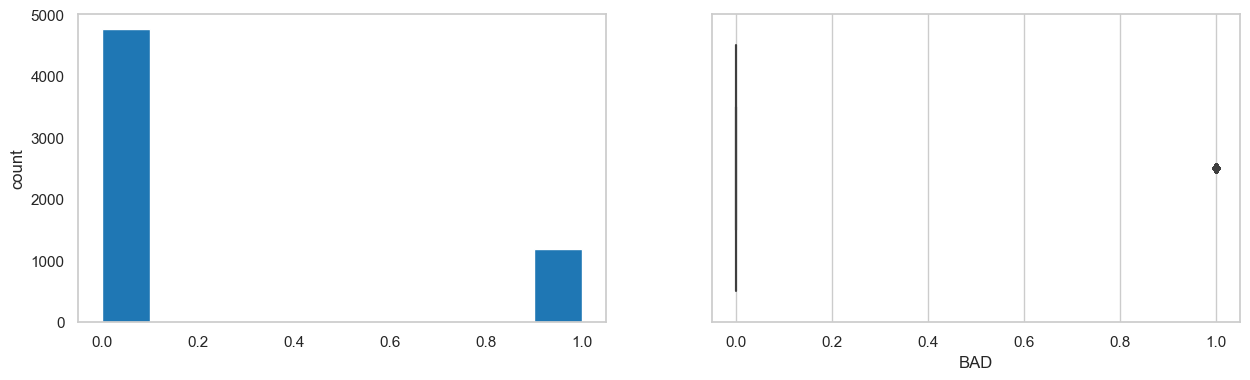

LOAN
Skew : 2.02


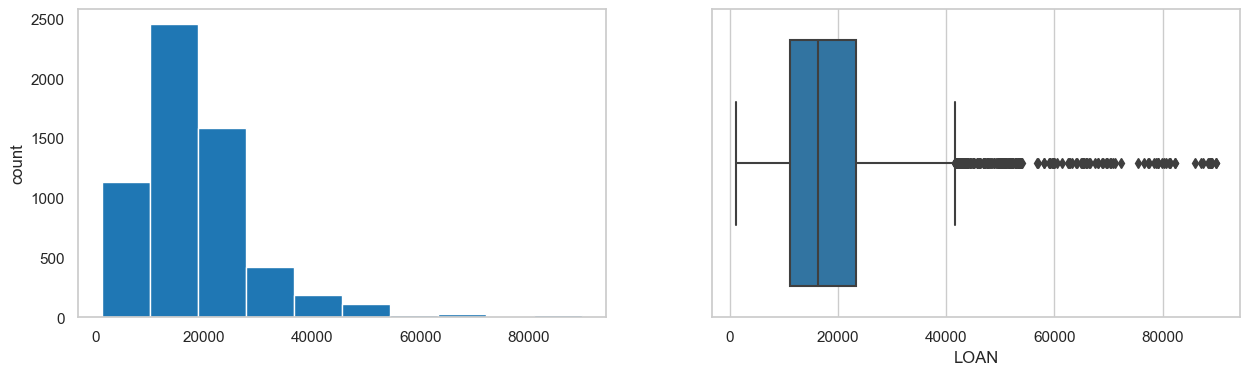

MORTDUE
Skew : 1.81


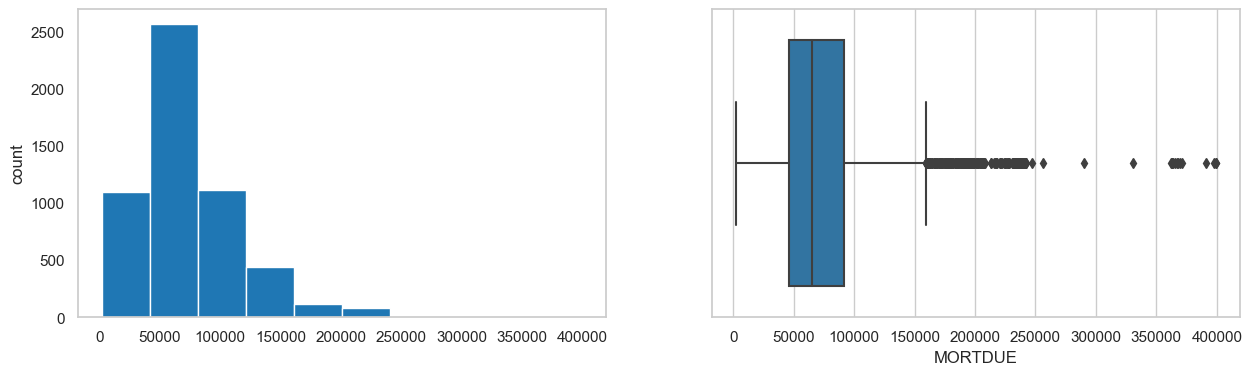

VALUE
Skew : 3.05


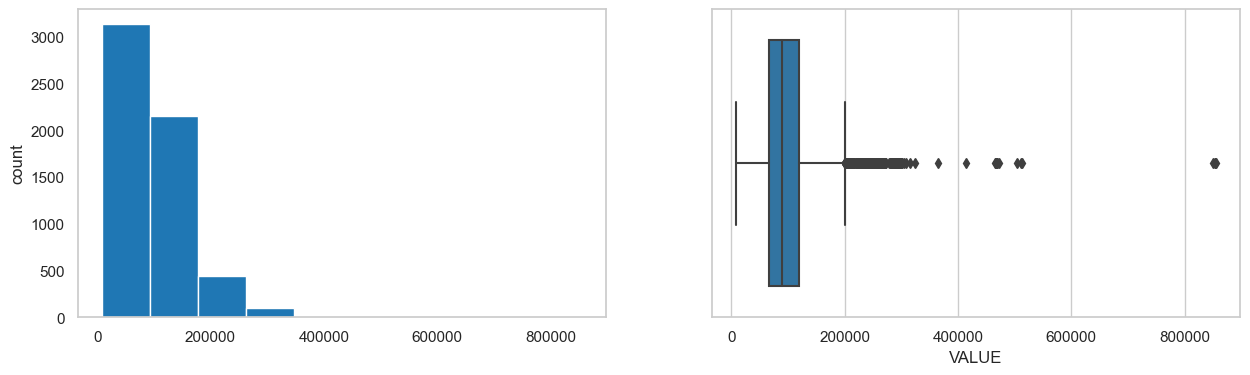

YOJ
Skew : 0.99


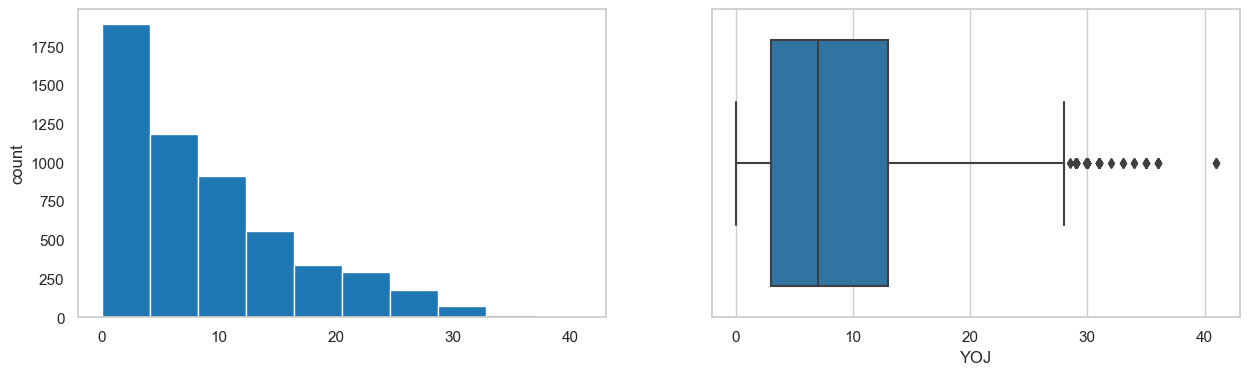

DEROG
Skew : 5.32


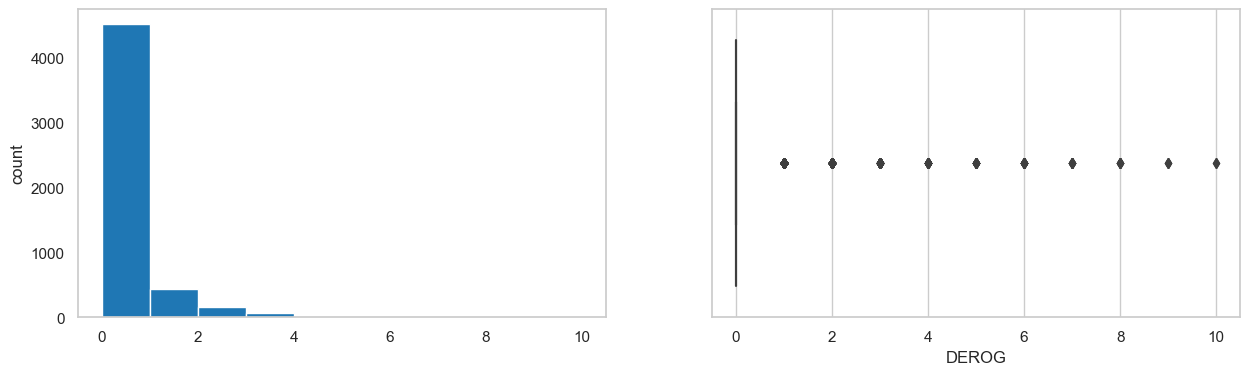

DELINQ
Skew : 4.02


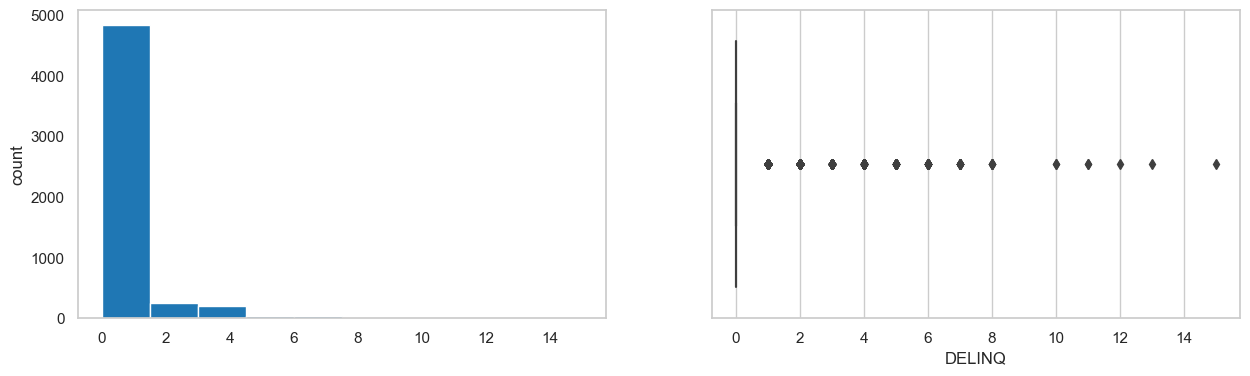

CLAGE
Skew : 1.34


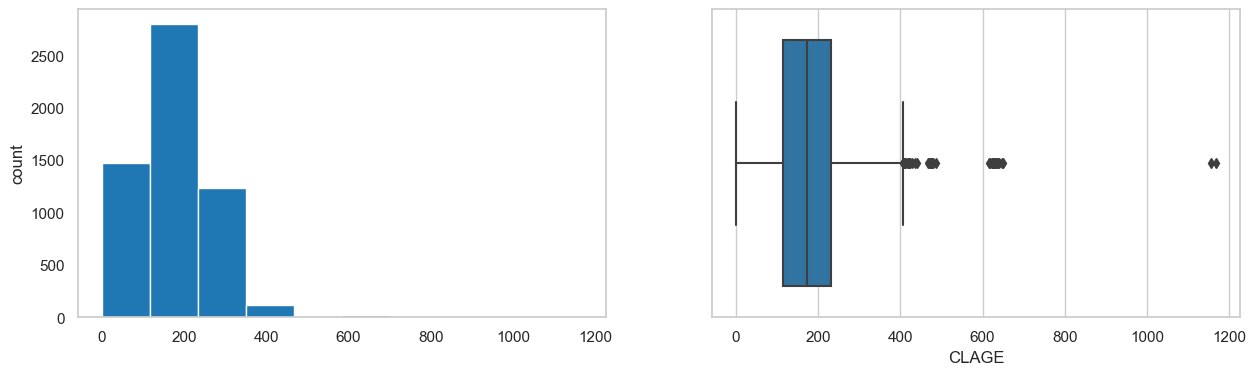

NINQ
Skew : 2.62


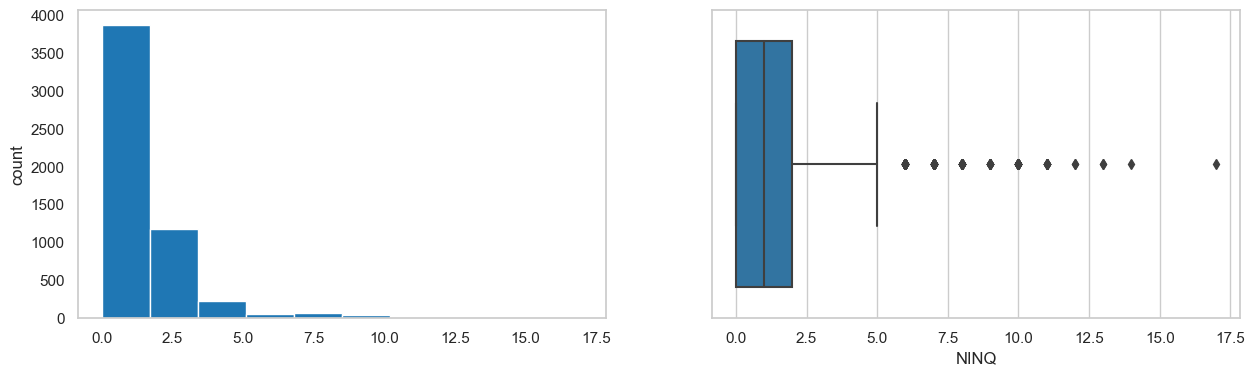

CLNO
Skew : 0.78


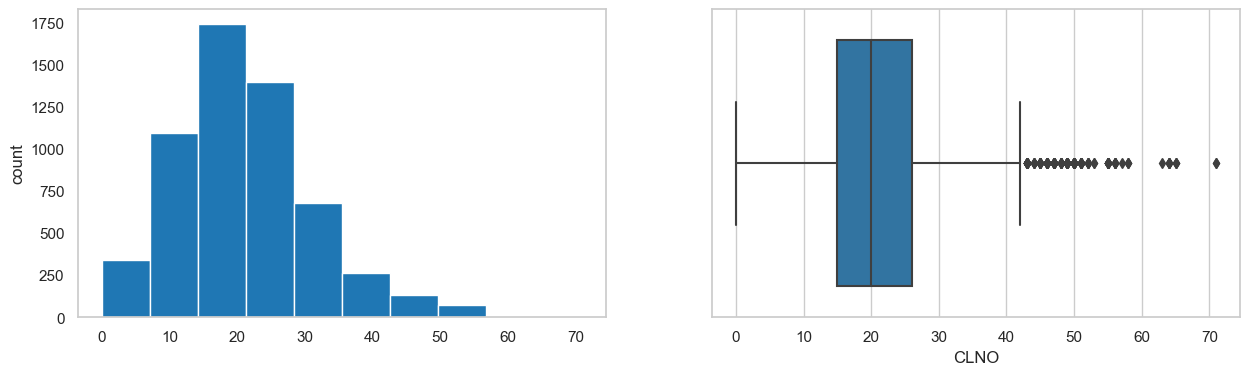

DEBTINC
Skew : 2.85


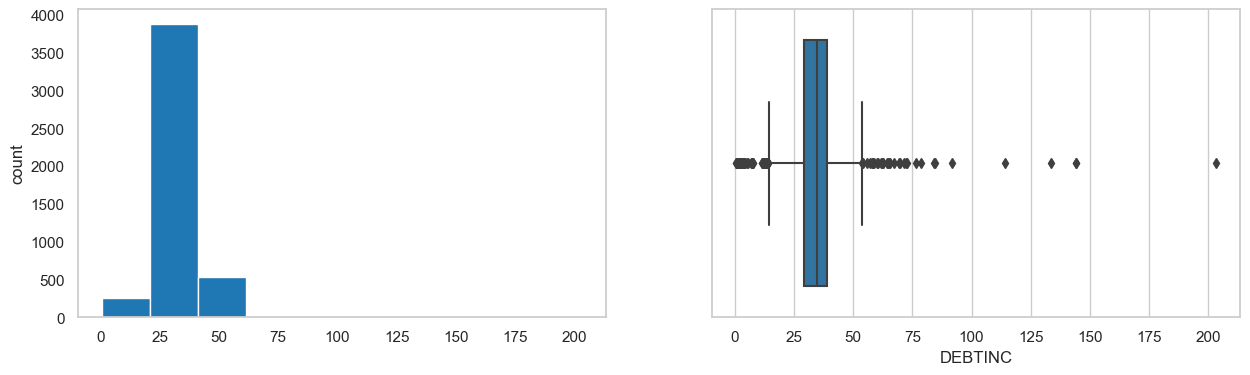

In [16]:
num_data = df.select_dtypes('number')

for col in num_data:
    print(col)
    
    print('Skew :',round(df[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    df[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = df[col])
    
    plt.show()

In [17]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

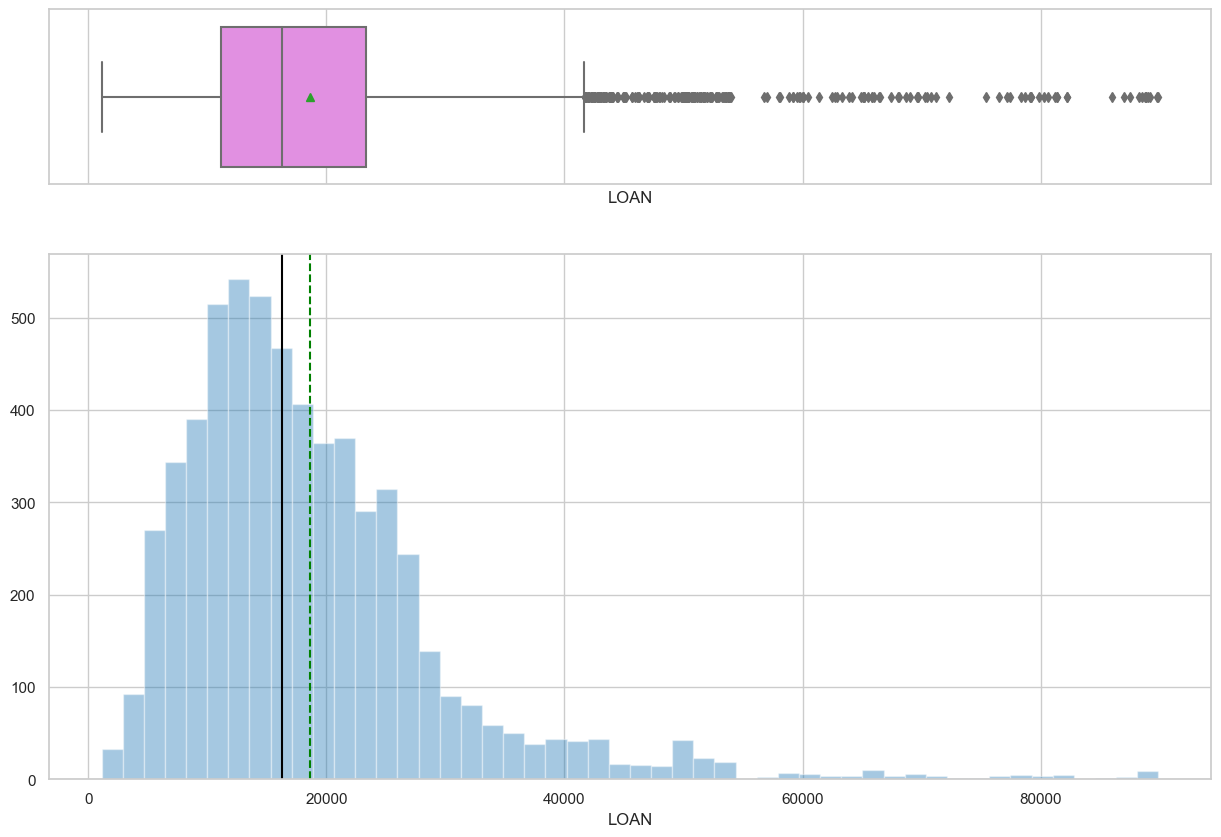

In [18]:
histogram_boxplot(df['LOAN'])

**Observations:**
* **All the variables except `DEBTINC` have a right-skewed distribution with outliers on the right end.**
* `DEBTINC` ratio is the only variable that also shows outliers on the right and left ends.
* `DEROG` and `DELINQ` show very few major reports and delinquent credit lines. Creating a binary variable with a value of 'o' for no report/delinquent credit lines and a value of '1' for 1 or more reports/delinquent credit lines might be more convenient.
* Some variables have a high number of outliers - `LOAN`,` MORTDUE`, `VALUE`, `CLNO`, `DEBTINC`.
* The 'typical client' have a loan of ~15000, a mortgage of ~75000, and the value of their property is ~100000
* The 'typical client' is ~5 years in their current job.
* The 'typical client' have a credit history with no major derogatory report and 1 delinquent credit line and ~1 credit inquiry.
* The 'typical client' have ~20 existing credit lines when the oldest one is ~200 month.
* The 'typical client' have a Debt-to-income ratio between 25 to 50 percent.
* Identifying clients that are not the typical client profile might help in predicting what clients are likely to default on their loan.

In [19]:
def perc_on_bar(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total)
        
        x=p.get_x()+p.get_width()/2 -0.05
        y=p.get_y()+p.get_height()
        
        ax.annotate(percentage, (x,y), size=12)
    
plt.show()

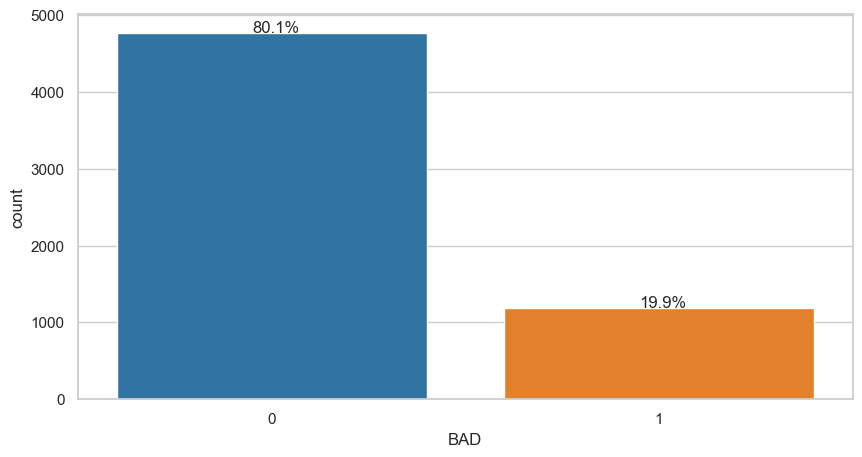

In [20]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df["BAD"])
perc_on_bar(ax, df["BAD"])

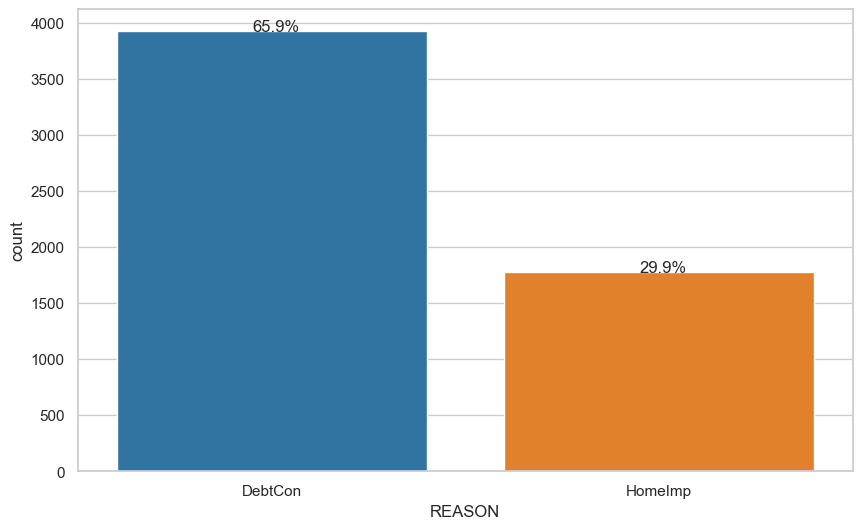

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df["REASON"])
perc_on_bar(ax, df["REASON"])

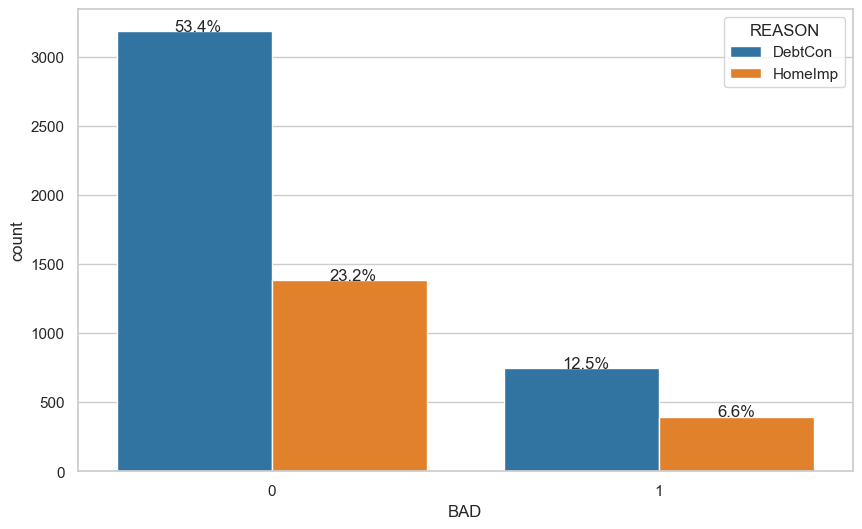

In [22]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'BAD', hue = 'REASON', data = df)
perc_on_bar(ax, df["BAD"])
plt.show()

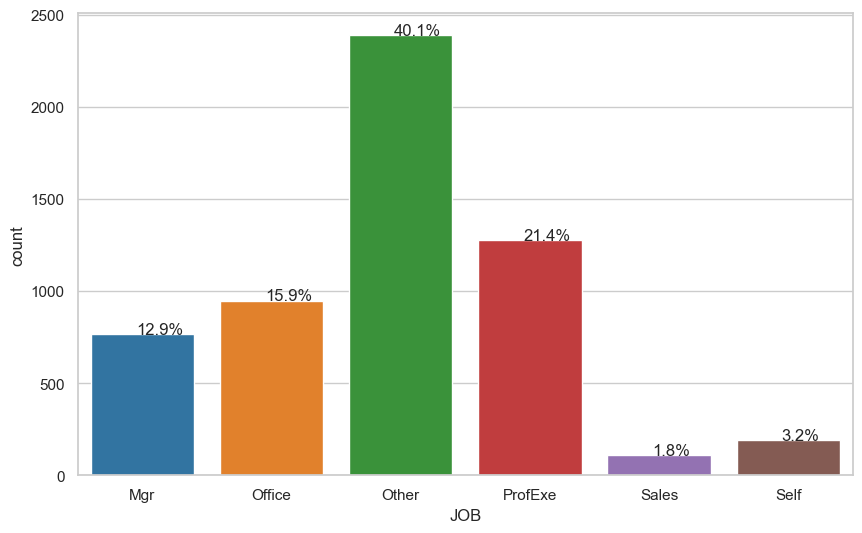

In [23]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df["JOB"])
perc_on_bar(ax, df["JOB"])

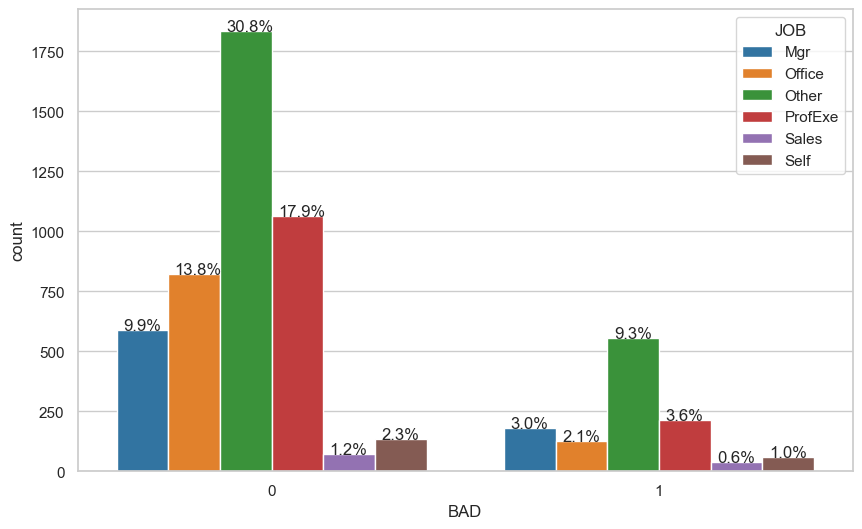

In [24]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'BAD', hue = 'JOB', data = df)
perc_on_bar(ax, df["BAD"])
plt.show()

**Observations:**
* About 60% of the clients took a loan to pay off other liabilities and consumer debts.
* **Debt Consolidations account for 53.4% of Clients who are not default** on their loans and **12.5% of those who default**.
* **Home Improvements** account for **23.2% of clients who are not default** on their loans and **6.6% for those who default.**
* Approximately 80% of the clients repaid their loans. This number is higher than the number of clients who defaulted on a loan, which is about 20%.
* The JOB types are mostly labeled as 'other'. All the other job types - manager, office, ProfExe are between 10-20%, and sales and self-employed are around 2%.

### **Bivariate Analysis**

**Analyze BAD vs LOAN**

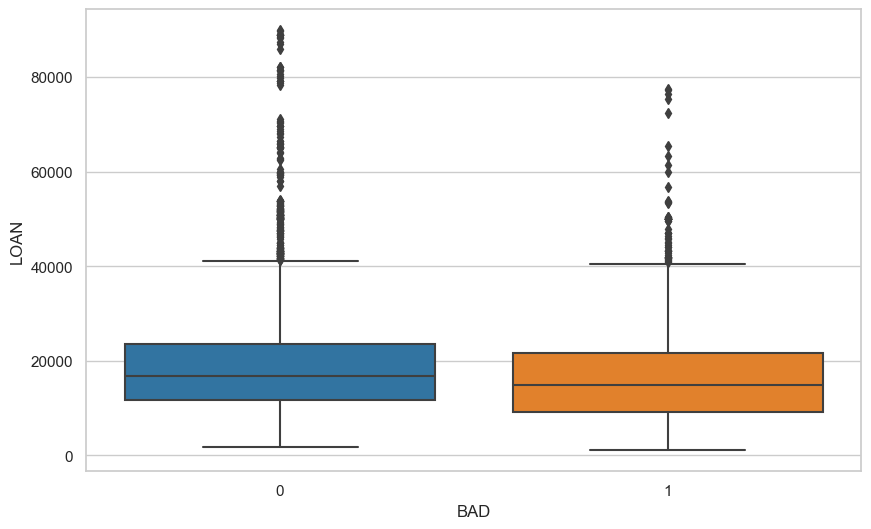

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(df["BAD"], df["LOAN"])
plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


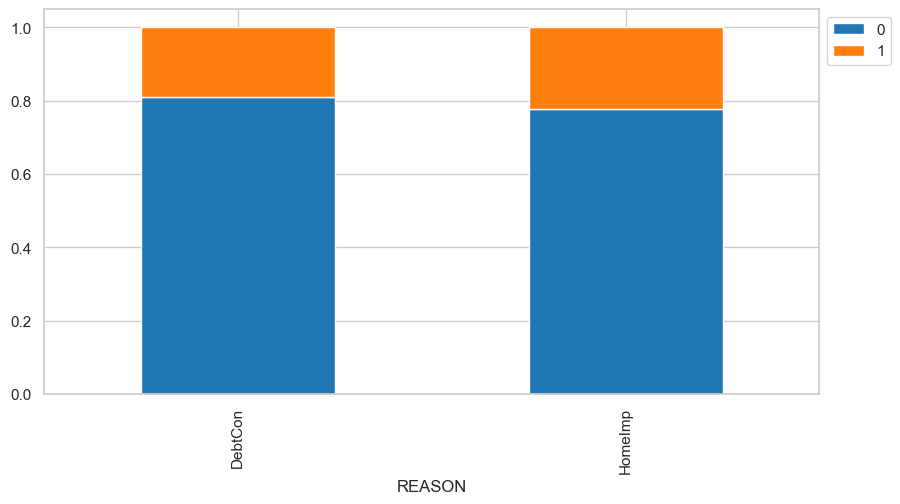

In [26]:
def stacked_plot(x):
    sns.set(context='notebook', style='whitegrid', palette='tab10', font='sans-serif', font_scale=1, rc=None)
    tab1 = pd.crosstab(x,df['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

# Plot stacked bar plot for BAD and REASON
stacked_plot(df['REASON'])

**Observations:**
* The amount of LOAN for those who default are lower than those who repay their loans.
* About 20% of the loans defaulted whether the reason for the loan is home improvement or DebtCon, and yet we can see that for loans that were requested for home improvement slightly more people defaulted on their loans.
* There seems to be a weak relation between requesting a loan for home improvement and the ability to repay the loan

Text(0.5, 0, 'LOAN')

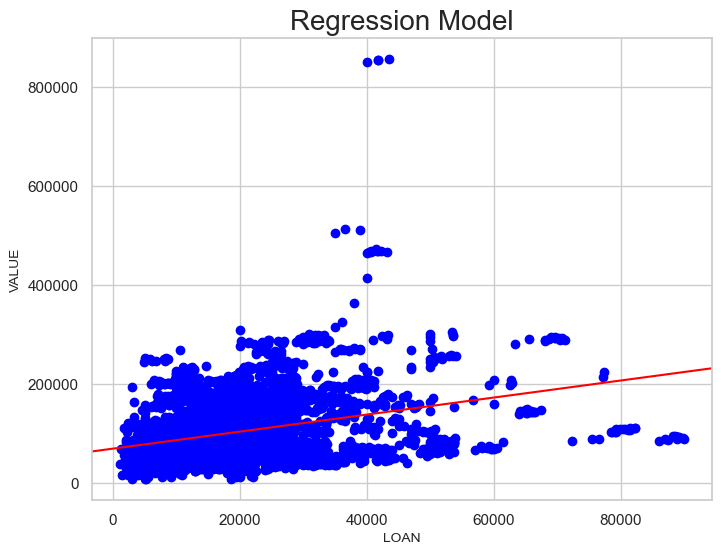

In [27]:
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

figure, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df["LOAN"], df["VALUE"], c='blue')
mod = smf.ols(formula='VALUE ~ LOAN', data = df).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('Regression Model', fontsize = 20)
ax.set_ylabel('VALUE', fontsize = 10)
ax.set_xlabel('LOAN', fontsize = 10)

Text(0.5, 0, 'MORTDUE')

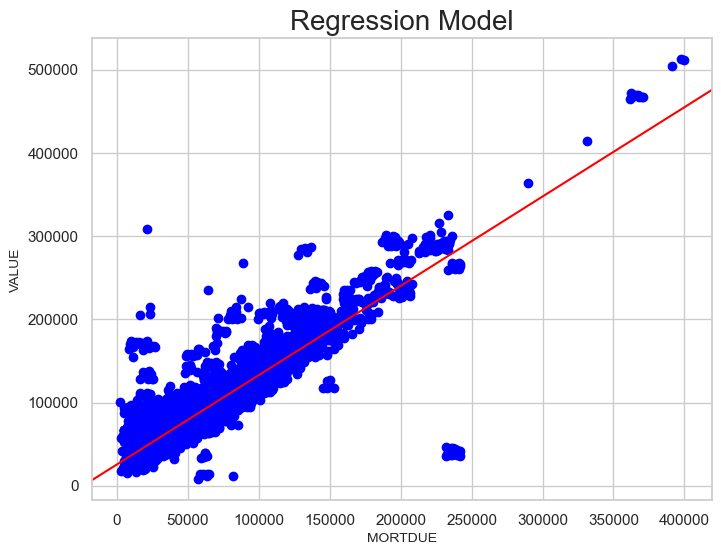

In [28]:
figure, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df["MORTDUE"], df["VALUE"], c='blue')
mod = smf.ols(formula='VALUE ~ MORTDUE', data = df).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('Regression Model', fontsize = 20)
ax.set_ylabel('VALUE', fontsize = 10)
ax.set_xlabel('MORTDUE', fontsize = 10)

**Observations:**
* Correlation between VALUE and LOAN are not highly correlated as there is no clear tendency between VALUE and LOAN
* VALUE and MORTDUE has a clear tendency with positive correlation

### **Multivariate Analysis**

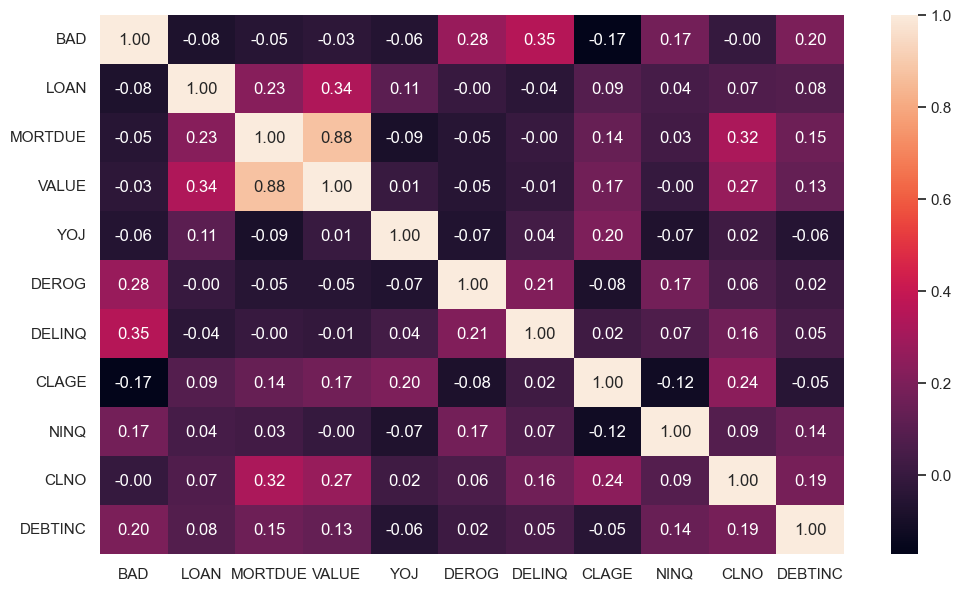

In [29]:
plt.figure(figsize = (12, 7))

sns.heatmap(df.corr(), annot = True, fmt = '.2f')

plt.show()

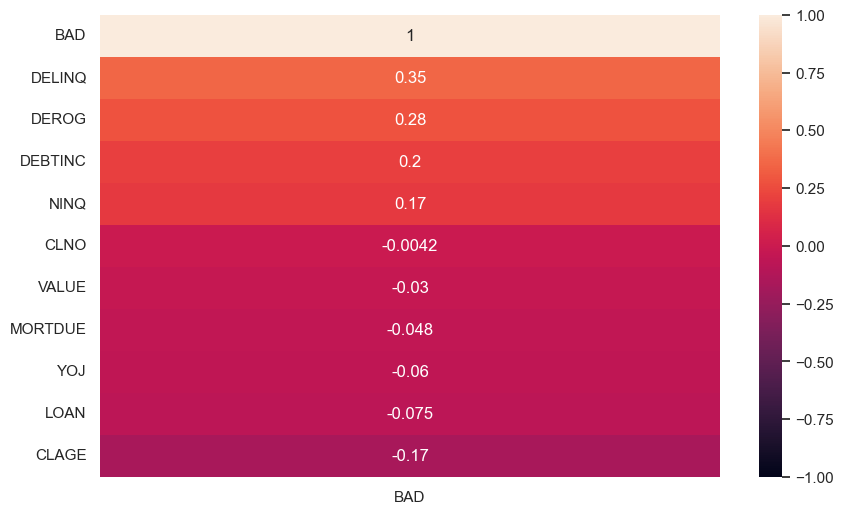

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()[['BAD']].sort_values(by='BAD', ascending=False),
            vmin=-1,
            annot=True);

In [31]:
cols = df.select_dtypes(['object']).columns.tolist()
cols.append('BAD')

In [32]:
cols

['BAD']

In [33]:
for i in cols:
    df[i]=df[i].astype('category')

**Observations:**
* There is a moderate positive correlation between the target variable (BAD) and credit history - (DELINQ, DEROG)

## Treating Outliers

In [34]:
def treat_outliers(df, col):
    Q1 = df[col].quantile(q = 0.25)
    Q3 = df[col].quantile(q = 0.75)
    IQR = Q3-Q1
    Lower_Whisker = (Q1-1.5*IQR)
    Upper_Whisker = (Q3+1.5*IQR)
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df 

In [35]:
def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df

In [36]:
print(col)

DEBTINC


In [37]:
df_raw = df.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

## Treating Missing Values

In [38]:
def add_binary_flag(df,col):
    new_col = str(col)
    new_col += 'missing_values_flag'
    df[new_col]=df[col].isna()
    return df

In [39]:
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

In [40]:
print(df["BAD"].unique())

[1, 0]
Categories (2, int64): [0, 1]


In [41]:
num_data = df.select_dtypes('number')

cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

df[num_data.columns] = num_data.fillna(num_data.median())

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [42]:
df.isnull().sum()

BAD                           0
LOAN                          0
MORTDUE                       0
VALUE                         0
REASON                        0
JOB                           0
YOJ                           0
DEROG                         0
DELINQ                        0
CLAGE                         0
NINQ                          0
CLNO                          0
DEBTINC                       0
MORTDUEmissing_values_flag    0
VALUEmissing_values_flag      0
REASONmissing_values_flag     0
JOBmissing_values_flag        0
YOJmissing_values_flag        0
DEROGmissing_values_flag      0
DELINQmissing_values_flag     0
CLAGEmissing_values_flag      0
NINQmissing_values_flag       0
CLNOmissing_values_flag       0
DEBTINCmissing_values_flag    0
dtype: int64

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

* The mean number of major derogatory reports is statistically higher for defaulted loans.
* The mean number of delinquent credit lines is statistically higher for default loans.
* There is a positive relationship between the MORTDUE Amount and the VALUE of the property
* There is a negative tendency between delinquent credit lines (DELINQ) vs. LOAN amount
* There is a negative tendency between the number of derogatory reports (DEROG) vs. the LOAN amount.
* As the number of DELINQ/DEROG increases, the loan amount decreases
* There is a moderate positive correlation between the target variable (BAD) and credit history- DELINQ, DEROG

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Data preparation for model

In [43]:
X = df.drop(columns = ['BAD'])
X = pd.get_dummies(X, drop_first=True)
y = df['BAD']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [45]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 27)
Shape of the test set:  (1788, 27)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


### Model Evaluation Criterion

**Model can make wrong predeiction as:**
1. Predicting an applicant will default on a loan, but in reality, the applicant would repay the loan.
    * The bank rejected the loan and lost a potential customer. The bank will not get the potential profit.(False positive)

2. Predicting an applicant will repay the loan, but in  reality, the applicant would default on the loan.
    * The bank approved the loan and the loan defaulted, the bank loses on a default loan (False negative)


**How to reduce the losses:**

* **Important metrics:** 
    * **Accuracy** 
        * measures the overall correctness of a model's predictions. High accuracy means that the model is making correct predictions for both positive and negative cases.
    * **Recall**
        * measures the ability of a model to correctly identify the actual positive cases. A high recall means that the model can effectively identify borrowers who are actually at risk of defaulting on their loans.
    
* The bank wants to maximize the recall. **The greater the recall score, the higher chance to minimize the False Negative case that results in defaulted loans.**

**Good performing model:**
* The best performing model will be tested based on its total performance. The model should show 
    * Accuracy: 85%+ 
    * Recall: 70%+
    * Precision: 65%

Using following algorithms to solve a classification prediction problem:
* Logistic regression model
* Decision tree model
* Random forest tree
* Boosting models
* K-nearest neighbors

In [46]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [47]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)
    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')              # To compute precision        
    acc = accuracy_score(target, pred)                                 # To compute accuracy score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

### Logistic Regression

Since the data is imbalanced, we will define the model with class weights as a standard parameter as "balanced"

In [48]:
lg = LogisticRegression(class_weight='balanced')
lg

LogisticRegression(class_weight='balanced')

In [49]:
lg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.88      0.59      0.71      3355
           1       0.28      0.67      0.40       817

    accuracy                           0.60      4172
   macro avg       0.58      0.63      0.55      4172
weighted avg       0.76      0.60      0.65      4172



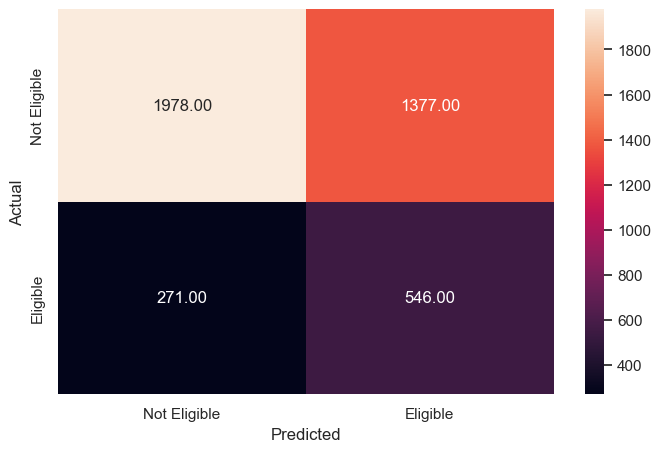

In [50]:
y_pred_train = lg.predict(X_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.87      0.59      0.70      1416
           1       0.30      0.66      0.41       372

    accuracy                           0.61      1788
   macro avg       0.58      0.63      0.56      1788
weighted avg       0.75      0.61      0.64      1788



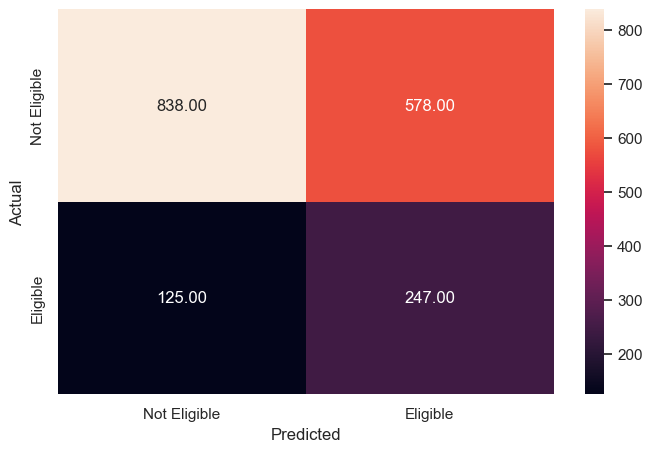

In [51]:
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

In [52]:
lg_test = model_performance_classification(lg,X_test,y_test)
lg_test

,Precision,Recall,Accuracy
0,0.584796,0.627893,0.606823


* We are getting an accuracy of about **60% on the train and the test datasets.**
* The recall for this model is **only 67% for class 1 on the train data and 66% test data.**
* As the recall is low **this model will not perform well on in detecting applicants that will default on a loan**, meaning it will lead to the bank loss on a defaulted loan

**Checking the coefficients**
* Find which variables are leading to loan default and which can help to reduce the default.

In [53]:
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,0.042640
CLNO,0.014309
NINQ,0.004848
DEBTINCmissing_values_flag,0.003862
YOJ,0.002110
JOB_Other,0.000694
VALUEmissing_values_flag,0.000583
REASON_HomeImp,0.000497
CLAGEmissing_values_flag,0.000160
JOB_Self,0.000140


The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [54]:
odds = np.exp(lg.coef_[0]) 

pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
DEBTINC,1.043563
CLNO,1.014411
NINQ,1.004859
DEBTINCmissing_values_flag,1.003870
YOJ,1.002112
JOB_Other,1.000694
VALUEmissing_values_flag,1.000583
REASON_HomeImp,1.000497
CLAGEmissing_values_flag,1.000160
JOB_Self,1.000140


* **High debt-to-income ratio increases the odds of default on a loan** 1.04 times more than a low debt-to-income ratio. high DEBTINC indicates that the applicant can not afford his/hers monthly mortgage payments, and having too much debt can be a sign of missing a payment or defaulting on the loan.


* Features that positively affect loan default: DEBTINC, `CLNO`, `NINQ`, `DEBTINC_missing_values_flag`,`YOJ`, `JOB_Other`,`VALUE_missing_values_flag`, `REASON_HomeImp`, `CLAGE_missing_values_flag`, `JOB_Self`, `JOB_Sales`, `CLNO_missing_values_flag`, `REASON_missing_values_flag`, `MORTDUE_missing_values_flag`


* Features that negatively affect loan default: `VALUE, MORTDUE`, `LOAN, NINQ_missing_values_flag`, `JOB_ProfExe`, `YOJ_missing_values_flag`, `JOB_missing_values_flag`, `JOB_Office`, `CLAGE`

**Precision-Recall Curve for Logistic Regression**

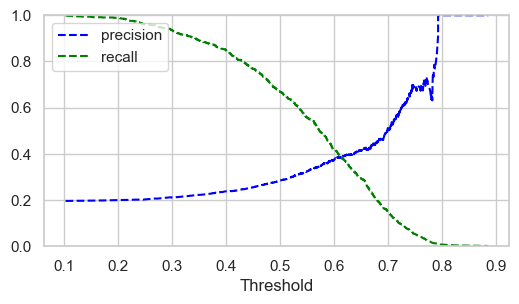

In [55]:
y_scores_lg = lg.predict_proba(X_train)
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

plt.figure(figsize = (6, 3))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 1])
plt.show()

**Observations:**
* The precision and the recall are balanced for a threshold of about 0.6

**Logistic regression model using 0.6 threshold**

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3355
           1       0.37      0.42      0.39       817

    accuracy                           0.75      4172
   macro avg       0.61      0.62      0.62      4172
weighted avg       0.76      0.75      0.75      4172



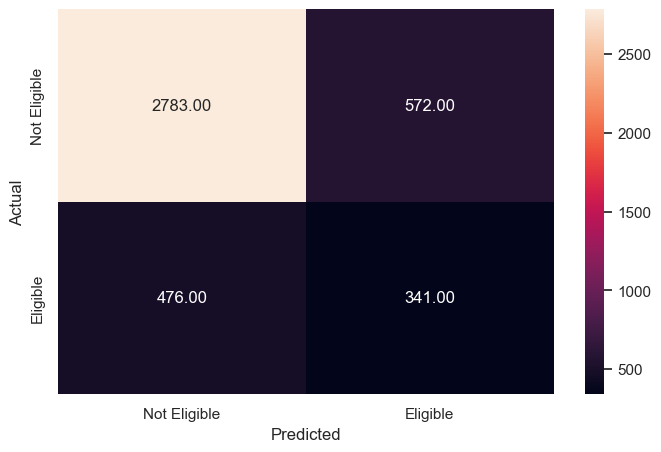

In [56]:
optimal_threshold1 = .6

y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1416
           1       0.37      0.39      0.38       372

    accuracy                           0.73      1788
   macro avg       0.60      0.61      0.60      1788
weighted avg       0.74      0.73      0.74      1788



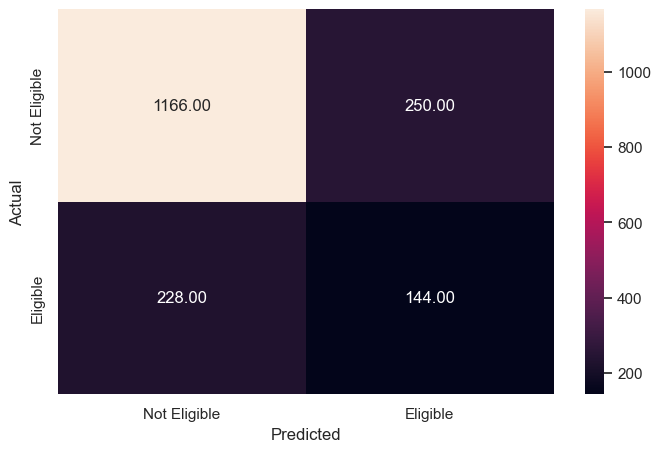

In [57]:
optimal_threshold1 = .6

y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

In [58]:
lg_6_test = model_performance_classification(lg,X_test,y_test)
lg_6_test

,Precision,Recall,Accuracy
0,0.584796,0.627893,0.606823


* The accuracy score increases to ~75% on the train and the test datasets
* The recall score decreases to 42% for class 1 on the train data and 39% for test data.
* As the recall is very low this model will not perform well on in detecting applicants that will default on a loan, meaning it will lead to the bank loss on a defaulted loan
* Since we are interested in higher recall let's see if we can get a better result using with a decreased treshold

**Logistic regression model using 0.45 threshold**

              precision    recall  f1-score   support

           0       0.89      0.45      0.60      3355
           1       0.25      0.77      0.38       817

    accuracy                           0.52      4172
   macro avg       0.57      0.61      0.49      4172
weighted avg       0.76      0.52      0.56      4172



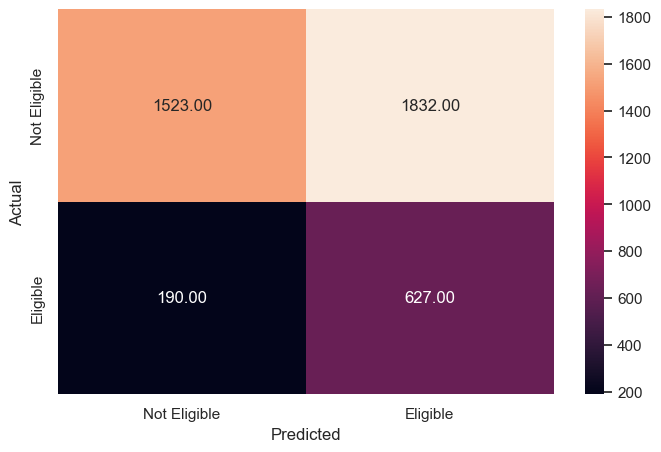

In [59]:
optimal_threshold1 = .45

y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.88      0.47      0.61      1416
           1       0.27      0.75      0.40       372

    accuracy                           0.53      1788
   macro avg       0.57      0.61      0.51      1788
weighted avg       0.75      0.53      0.57      1788



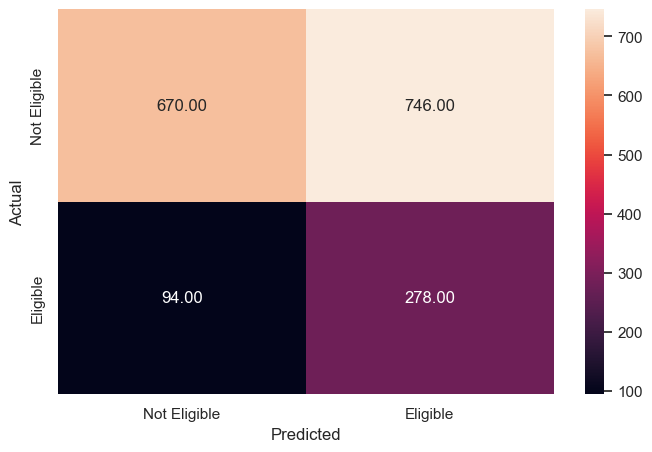

In [60]:
optimal_threshold1 = .45

y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

In [61]:
lg_45_test = model_performance_classification(lg,X_test,y_test)
lg_45_test

,Precision,Recall,Accuracy
0,0.584796,0.627893,0.606823


* As expected the accuracy score decreased to 53%
* The recall score increased to 77% for class 1 on the train data and 75% % for test data.
* Although the recall score increased significantly the total preference of the model is not sufficient considering the performance score criteria we have defined.

### Decision Tree

In [62]:
X = df.drop(columns = ['BAD'])
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4172, 27) (1788, 27)


In [64]:
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 27)
Shape of the test set:  (1788, 27)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


In [65]:
d_tree =  DecisionTreeClassifier(random_state=7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



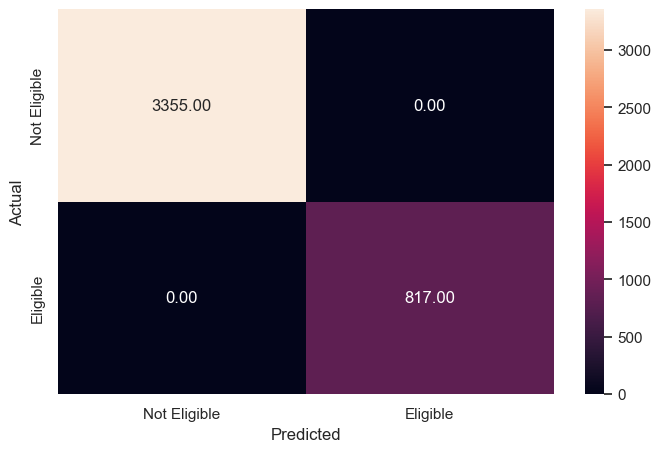

In [66]:
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:**
* The model did significantly worse on the testing data (f1-score-30%), it is **overfitted** and does not generalize well.
* The model is predicting equally on recall (70%) and precision (69%), we would like to prioritize **increasing recall (minimizing false negatives).**

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1416
           1       0.66      0.59      0.63       372

    accuracy                           0.85      1788
   macro avg       0.78      0.76      0.77      1788
weighted avg       0.85      0.85      0.85      1788



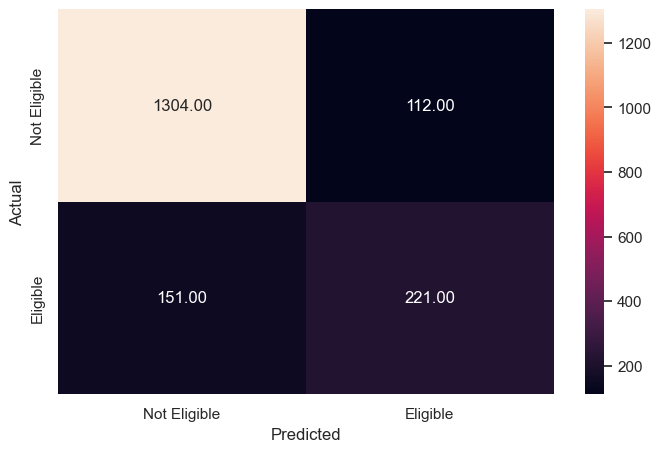

In [67]:
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

In [68]:
d_tree_test = model_performance_classification(d_tree, X_test, y_test)
d_tree_test

,Precision,Recall,Accuracy
0,0.779942,0.757495,0.852908


**Observations:**
* **The Decision Tree gives 100% score for the train data set**, i.e., the Decision Tree is overfitting the training data.
* **The recall is 59%** in comparison to 1 for the training dataset
* **The precision on the test data suggests that there's a 30% (1 - 0.7) chance** that the model will predict that a loan will default even though it would not

* According to the Decision Tree, DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC. This signifies that applicants who are at risk of default a loan have high debt and relatively low income
* The other important features CLNO, LOAN, CLAGE, VALUE, MORTDUE.

In [69]:
rf_estimator = RandomForestClassifier(random_state=7, criterion="entropy")

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



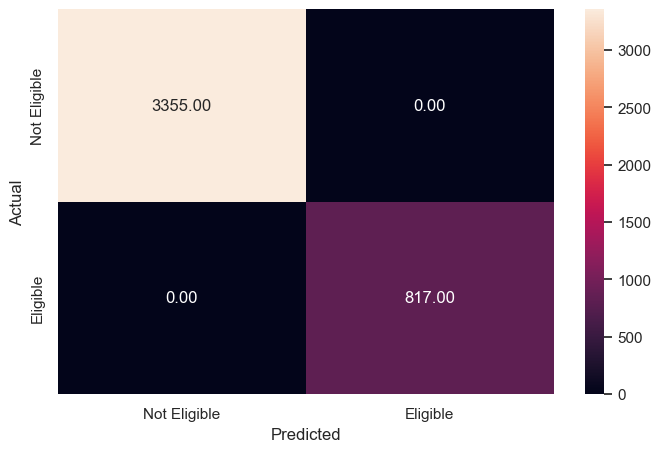

In [70]:
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:**
* The model is back to being overfitted, not surprising given we are using a unrestrained random forest.
* Without any class weight precision is now higher than recall, the opposite of our goal.

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.80      0.63      0.70       372

    accuracy                           0.89      1788
   macro avg       0.85      0.79      0.82      1788
weighted avg       0.88      0.89      0.88      1788



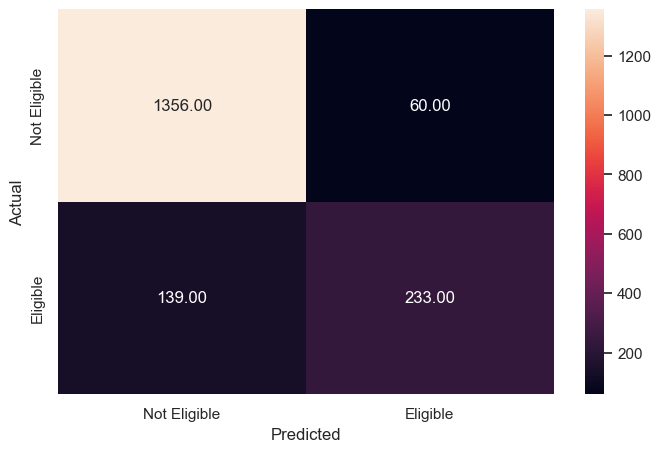

In [71]:
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
* The model is no longer overfitted with a testing **f1-score of 70% (equal to the training accuracy), meaning it will generalize well.**
* The **recall is lowest at 63%** below the precision of 80%. Recall is lower than precision, this is opposite with our goals of reducing false negatives.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [72]:
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

scorer = metrics.make_scorer(recall_score, pos_label = 1)


grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

d_tree_tuned = grid_obj.best_estimator_

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=4,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3355
           1       0.65      0.76      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.83      0.81      4172
weighted avg       0.88      0.87      0.88      4172



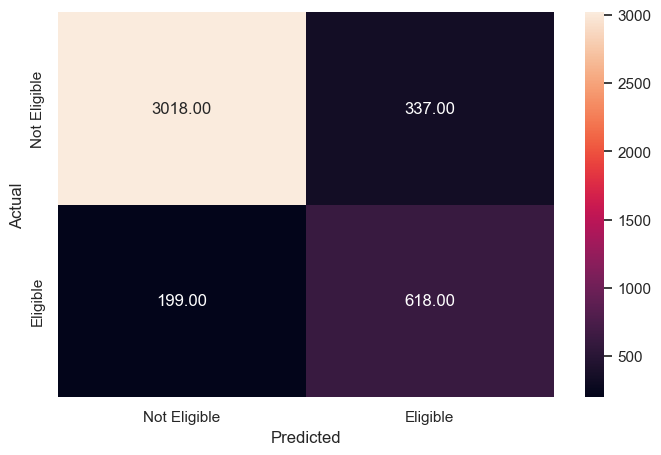

In [73]:
y_train_pred_d_tree = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_d_tree)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.66      0.73      0.69       372

    accuracy                           0.87      1788
   macro avg       0.80      0.82      0.80      1788
weighted avg       0.87      0.87      0.87      1788



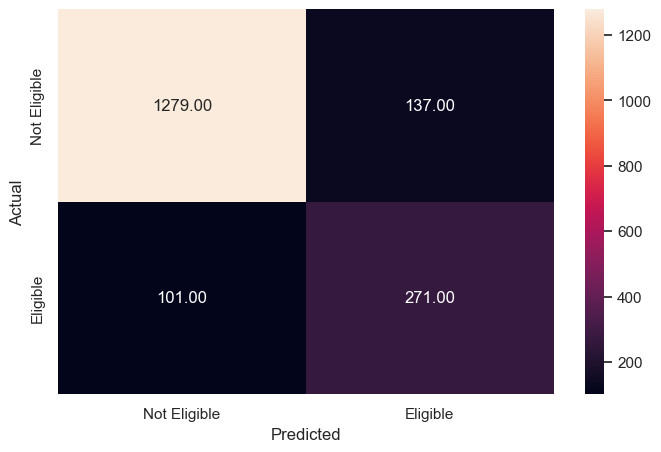

In [74]:
y_test_pred_d_tree = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_d_tree)

In [75]:
dtree_tuned_test = model_performance_classification(d_tree_tuned,X_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.795514,0.815872,0.86689


<AxesSubplot:xlabel='Importance'>

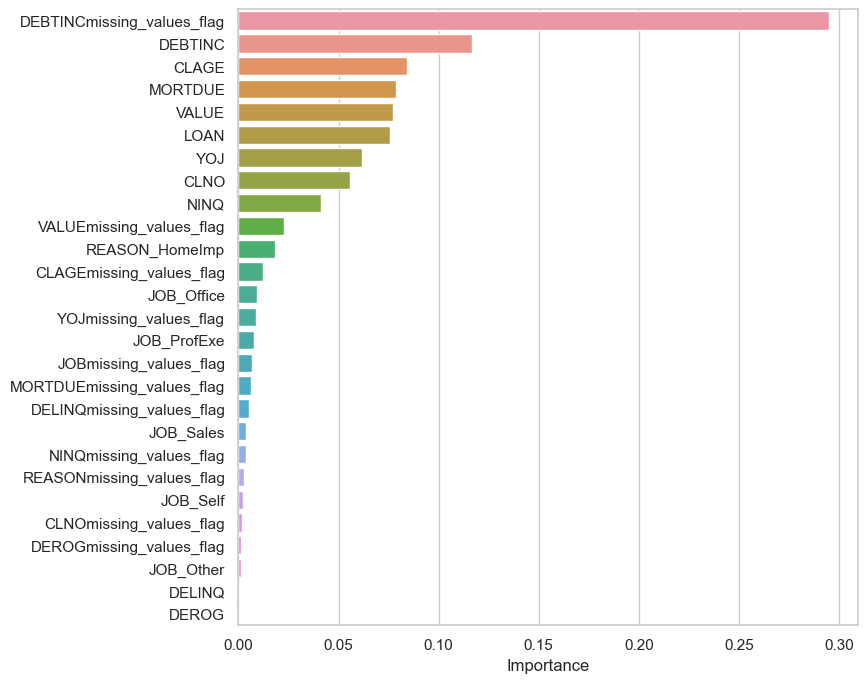

In [76]:
importances = d_tree.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(importance_df.Importance, importance_df.index)

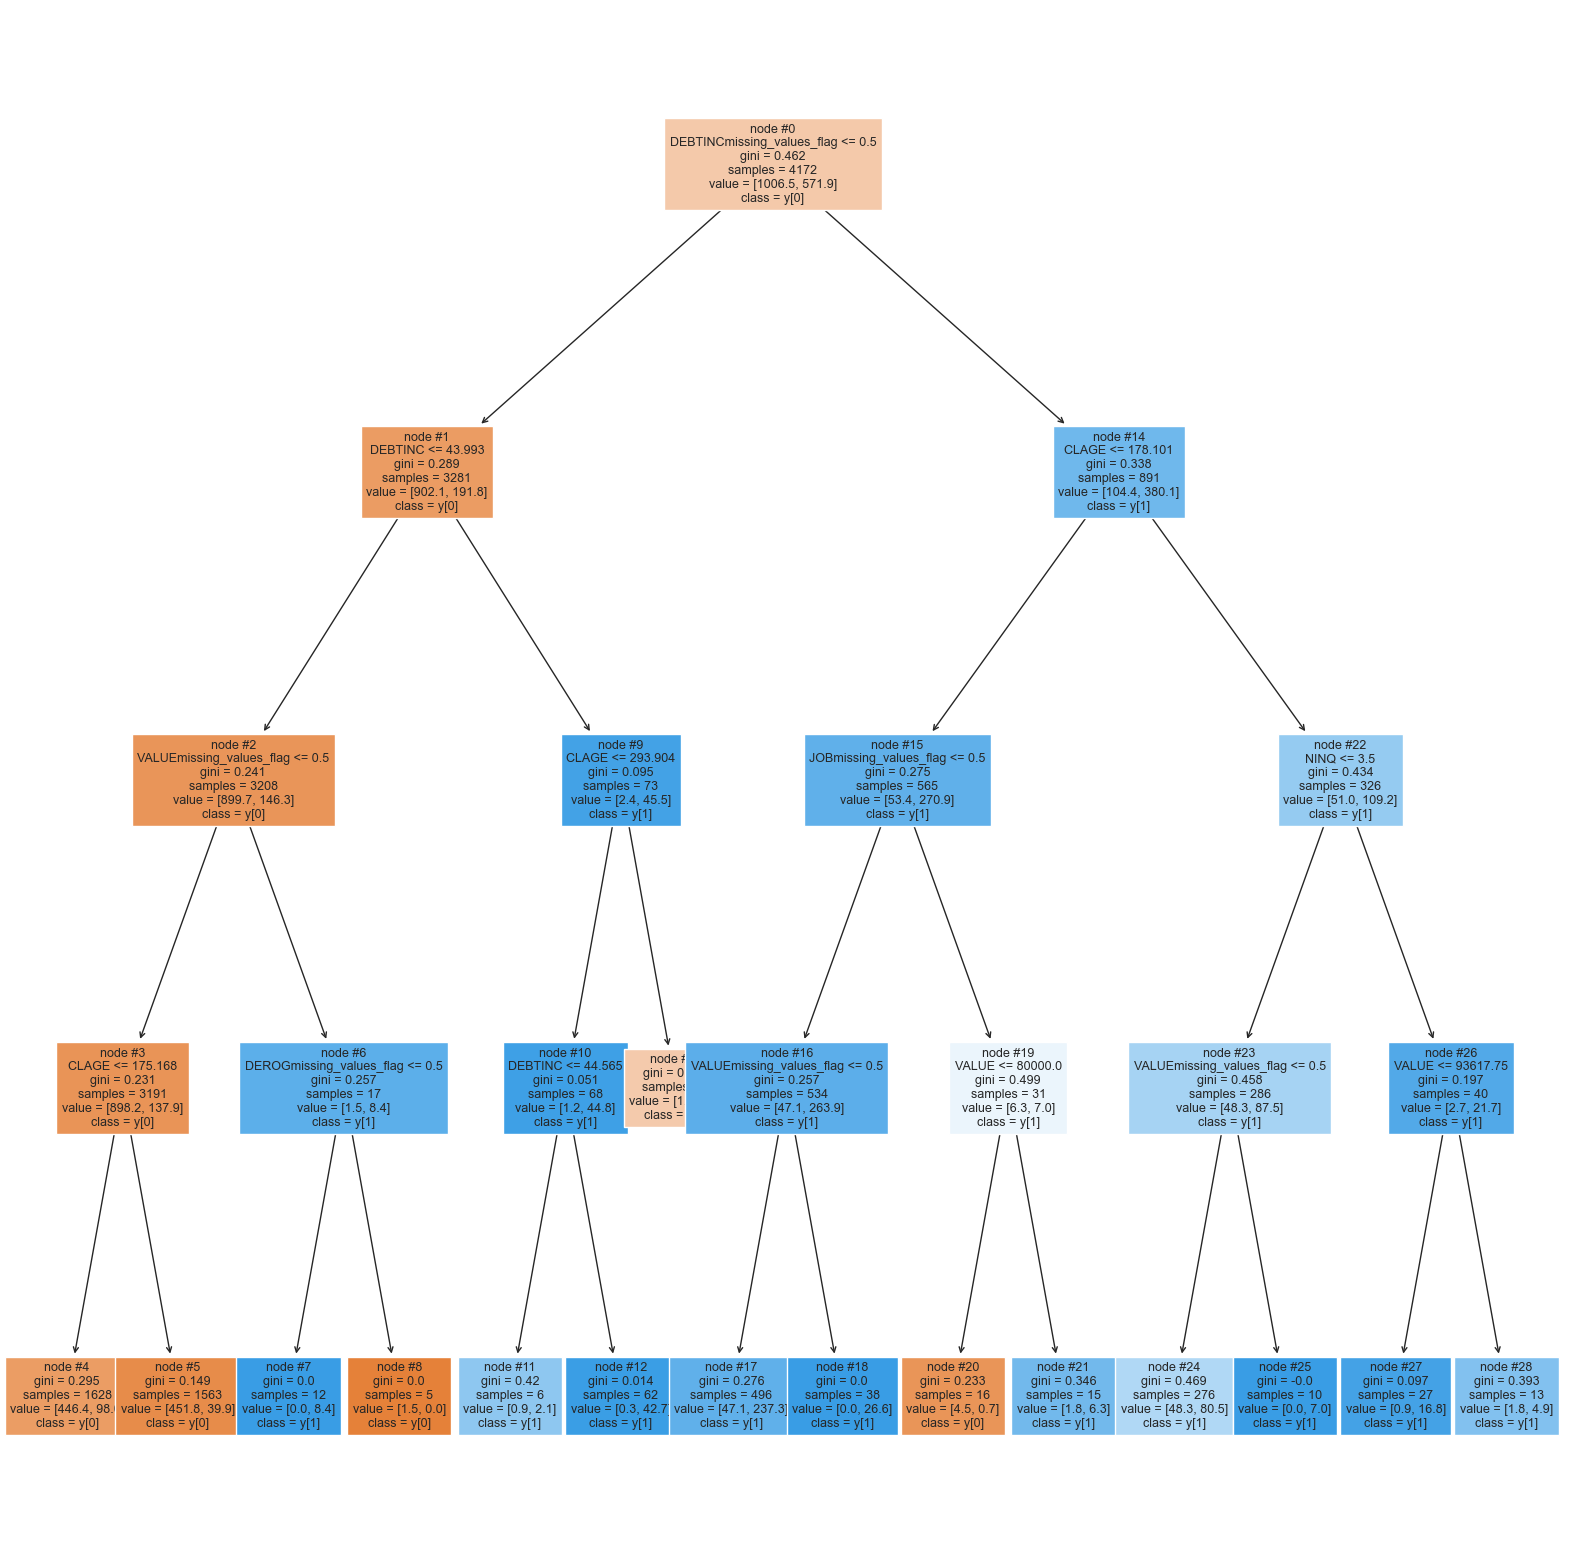

In [77]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Observations:**
* This model is not overfitting the training data and the recall score changes to 73% for the test set
* Precision has gone up from 65% to 66%
* The model gives consistent result for the train and test data sets

<AxesSubplot:xlabel='Importance'>

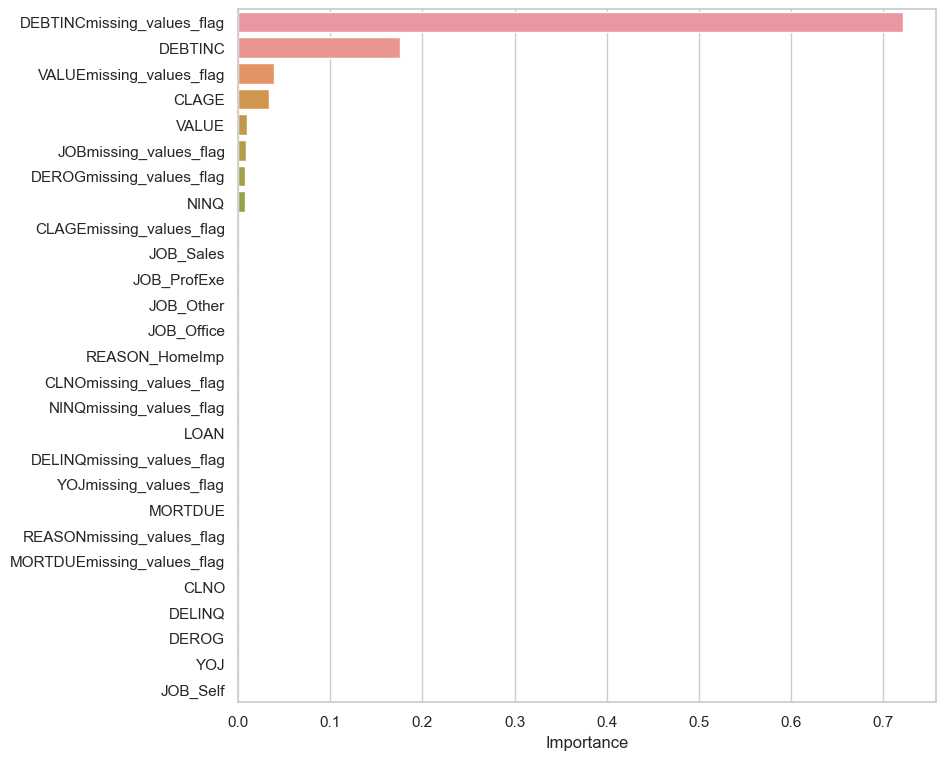

In [78]:
importances =d_tree_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (9, 9))
sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**
* After tuning the DT model we are getting fewer features that are important.
* According to this model too, the DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC.
* The other features are much less impactful in defaulting on a loan.
* The tuned model is more generalized than the default model.

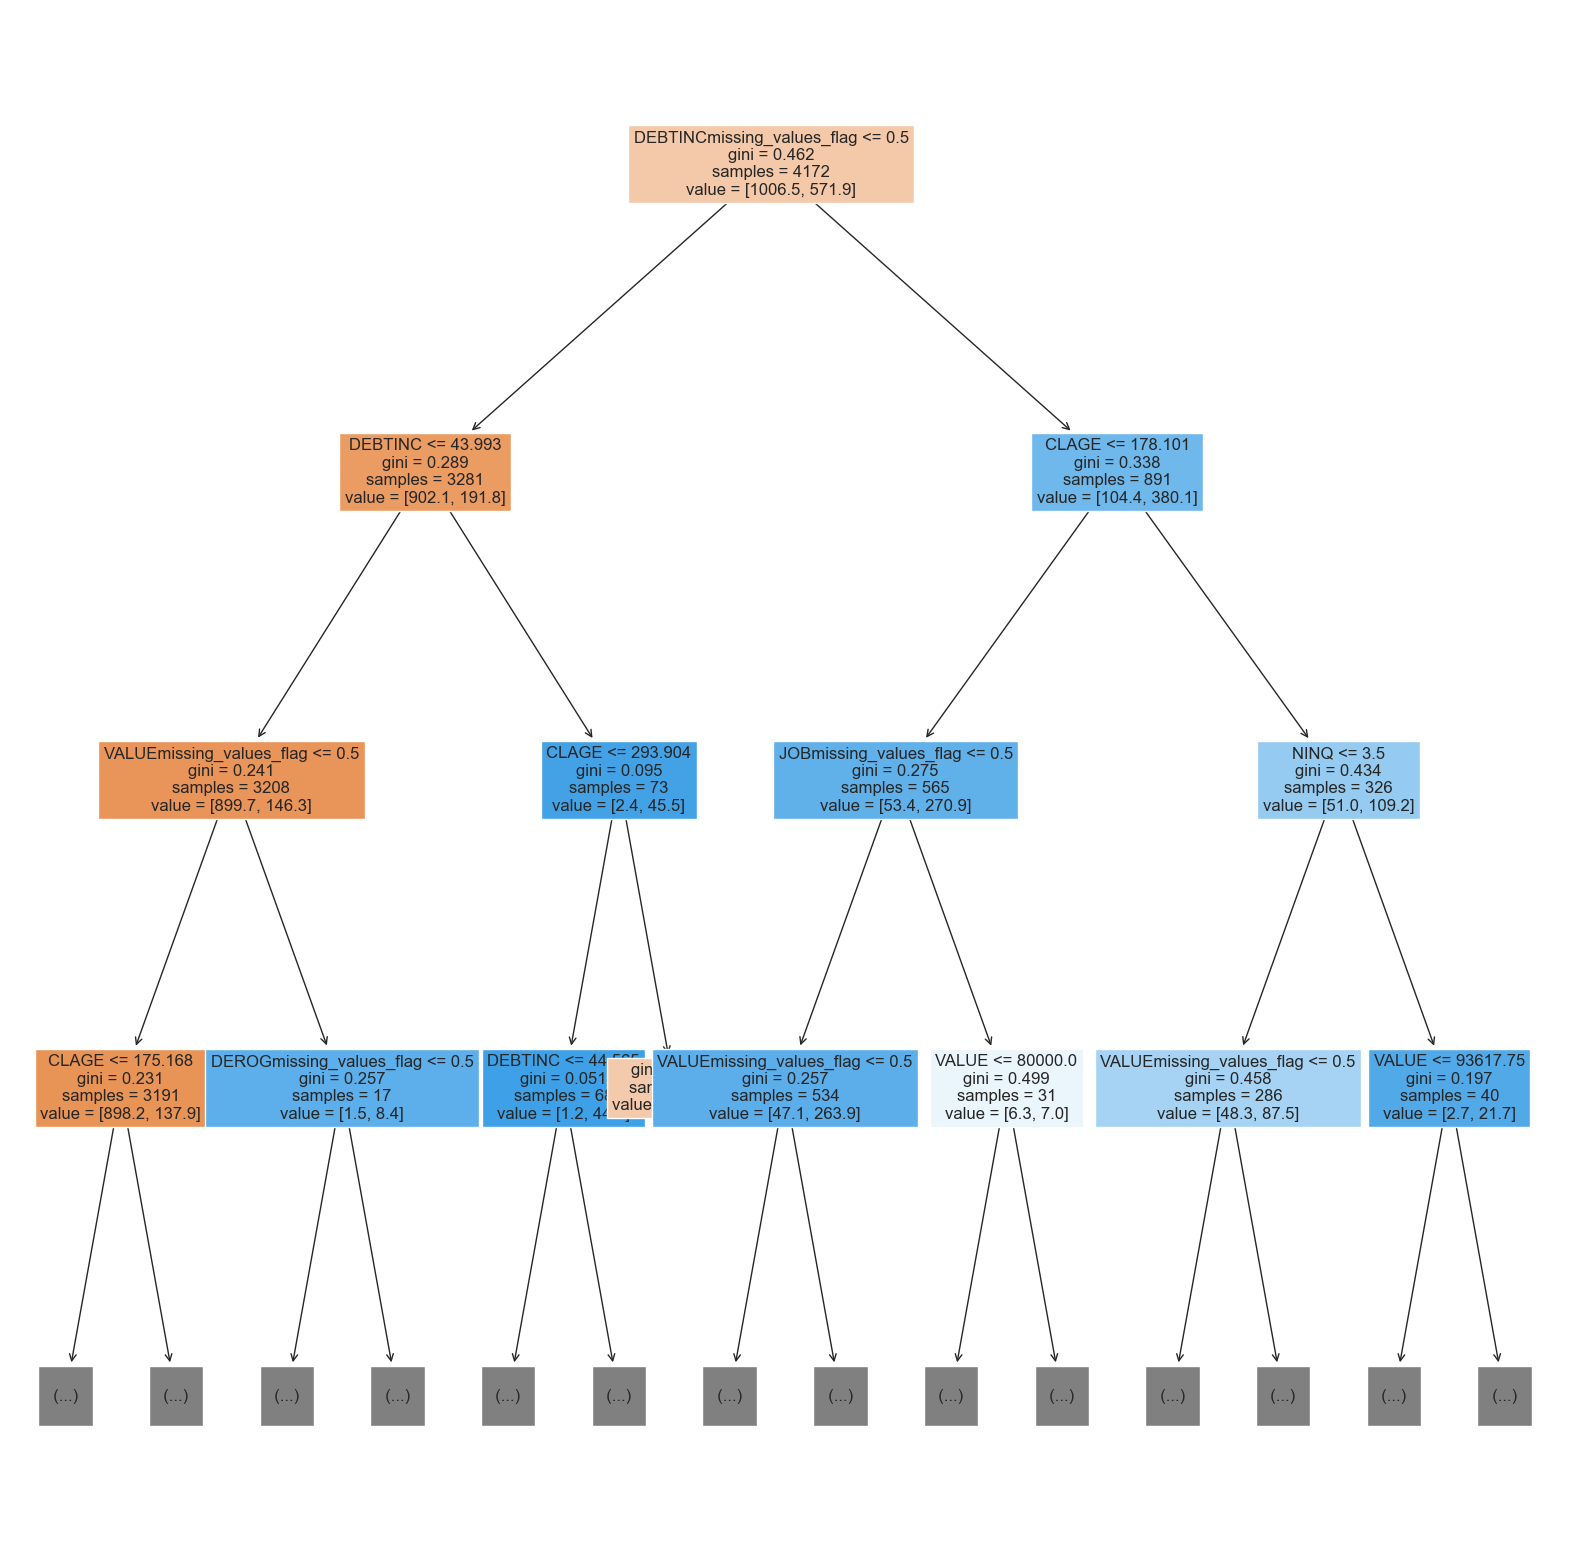

In [79]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, max_depth = 3, feature_names = features, filled = True, fontsize = 12)

plt.show()

**Observations:**
* Blue leaves represent the defult loans, i.e., y[1] and the orange leaves represent the reapy loan, i.e., y[0].
* The more the number of observations in a leaf, the darker its color gets.

In [80]:
text_representation = tree.export_text(d_tree_tuned, feature_names= features)
print(text_representation)

|--- DEBTINCmissing_values_flag <= 0.50
|   |--- DEBTINC <= 43.99
|   |   |--- VALUEmissing_values_flag <= 0.50
|   |   |   |--- CLAGE <= 175.17
|   |   |   |   |--- class: 0
|   |   |   |--- CLAGE >  175.17
|   |   |   |   |--- class: 0
|   |   |--- VALUEmissing_values_flag >  0.50
|   |   |   |--- DEROGmissing_values_flag <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- DEROGmissing_values_flag >  0.50
|   |   |   |   |--- class: 0
|   |--- DEBTINC >  43.99
|   |   |--- CLAGE <= 293.90
|   |   |   |--- DEBTINC <= 44.57
|   |   |   |   |--- class: 1
|   |   |   |--- DEBTINC >  44.57
|   |   |   |   |--- class: 1
|   |   |--- CLAGE >  293.90
|   |   |   |--- class: 0
|--- DEBTINCmissing_values_flag >  0.50
|   |--- CLAGE <= 178.10
|   |   |--- JOBmissing_values_flag <= 0.50
|   |   |   |--- VALUEmissing_values_flag <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- VALUEmissing_values_flag >  0.50
|   |   |   |   |--- class: 1
|   |   |--- JOBmissing_values_flag >  0.50
|   |

**Decision tree rules**
* If there is a missing value for the client's DEBTINC - the client will likely default
* clients with DEBTINC higher than 43 and CLAGE less than 217 are likely to default -We can see again that the Debt-to-income ratio is the most important driver for defaulting or repaying a loan. The bank should consider this as a top feature to consider while processing a loan request.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [81]:
rf_estimator = RandomForestClassifier(random_state = 7)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



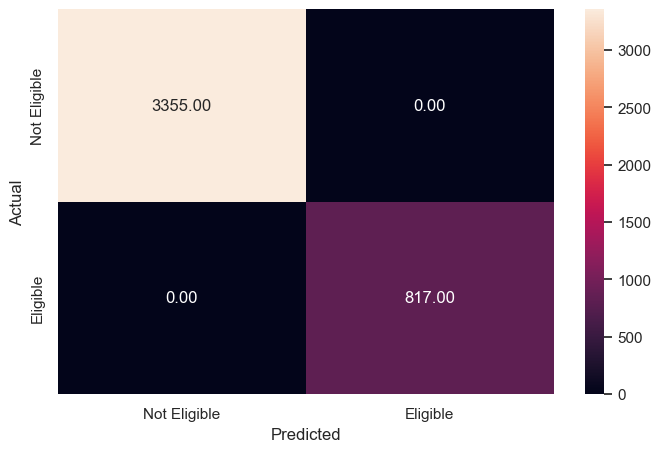

In [82]:
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.81      0.63      0.71       372

    accuracy                           0.89      1788
   macro avg       0.86      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



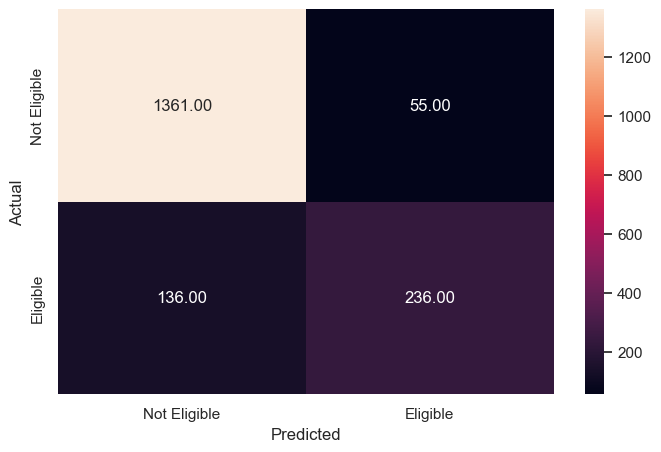

In [83]:
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [84]:
rf_estimator_test = model_performance_classification(rf_estimator,X_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.860074,0.797783,0.893177


**Observations:**
* The Random Forest is giving a 100% score for all metrics on the training dataset.
* The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 70% for class 1.
* Precision is good for the test data- 89%
* Recall is 63% for the test data

**Random Forest model with balanced class weights**

In [85]:
rf_estimator_balanced = RandomForestClassifier(class_weight = 'balanced', random_state = 7)
rf_estimator_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=7)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



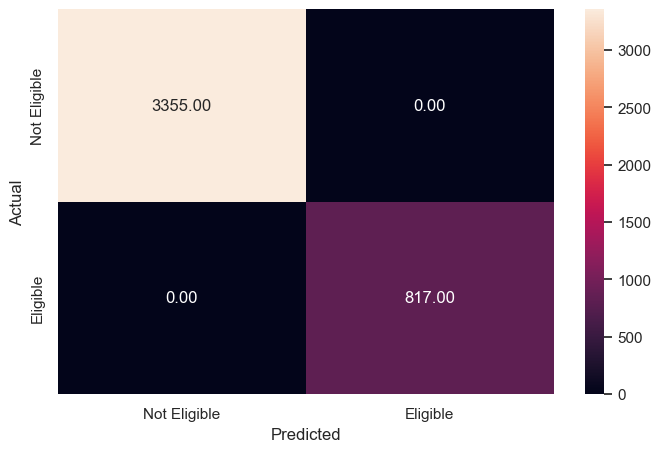

In [86]:
y_pred_train3 = rf_estimator_balanced.predict(X_train)
metrics_score(y_train, y_pred_train3)

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.81      0.63      0.71       372

    accuracy                           0.89      1788
   macro avg       0.86      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



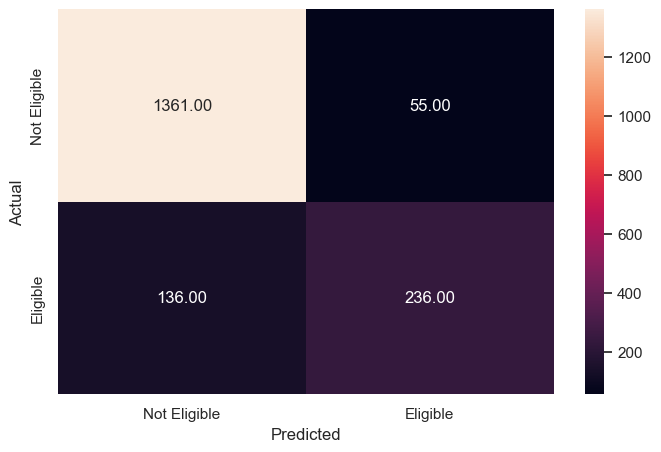

In [87]:
y_pred_train3 = rf_estimator_balanced.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [88]:
rf_estimator_balanced_test = model_performance_classification(rf_estimator_balanced,X_test,y_test)
rf_estimator_balanced_test

,Precision,Recall,Accuracy
0,0.856855,0.782714,0.888143


**Observations:**
* The balanced random forest did not improve the model performance
* The balanced Random Forest is also giving a 100% score for all metrics on the training dataset.
* The balanced Random Forest classifier is also overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 63% for class 1 compared to 70% in the baseline model
* Precision is good for the test data- 80%
* Recall is 63% for the test data

**Tuning the Random Forest**

### **Random Forest Classifier Hyperparameter Tuning**

In [89]:
rf_estimator_tuned = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}

scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

rf_estimator_tuned = grid_obj.best_estimator_

In [90]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=3,
                       random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3355
           1       0.79      0.97      0.87       817

    accuracy                           0.94      4172
   macro avg       0.89      0.95      0.92      4172
weighted avg       0.95      0.94      0.95      4172



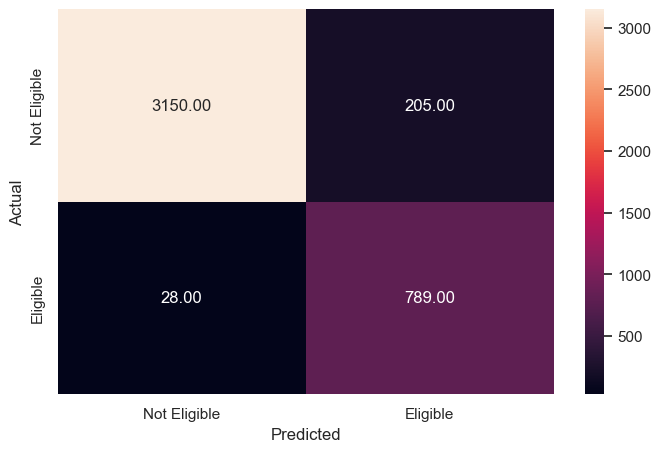

In [91]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

**Checking performance on the test dataset**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1416
           1       0.73      0.75      0.74       372

    accuracy                           0.89      1788
   macro avg       0.83      0.84      0.83      1788
weighted avg       0.89      0.89      0.89      1788



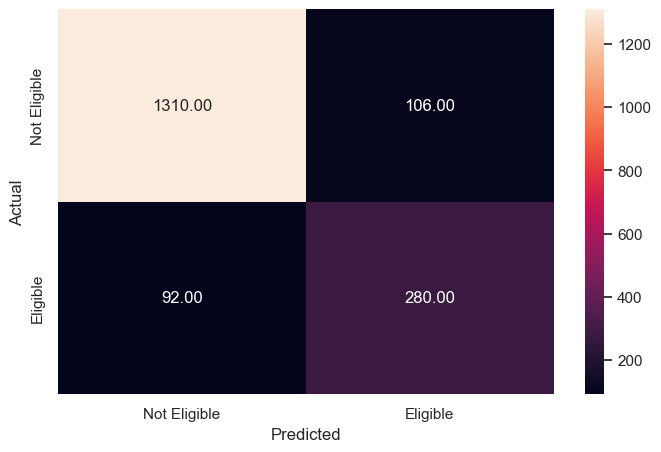

In [92]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [93]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, X_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.829884,0.838915,0.889262


**Observations:**
* The tuned random forest improves the model performance.
* The tuned Random Forest is not giving a 100% score for all metrics on the training dataset- there is less overfitting of the training data
* The recall on the training data is 97%, while the recall on the test data is only 75% for class 1 compared to 65% in the baseline model and 61% for the balanced random forest model.
* Precision for the test set is 73%, it has decreased compared to the baseline model and balanced model at 79%, this is expected as we were trying to reduce overfitting
* In our case, we are assessing the model mainly by the recall score. in the tuned random forest we got the lowest number of false negative cases so far.

**Checking the feature importance-tuned Random Forest**

<AxesSubplot:xlabel='Importance'>

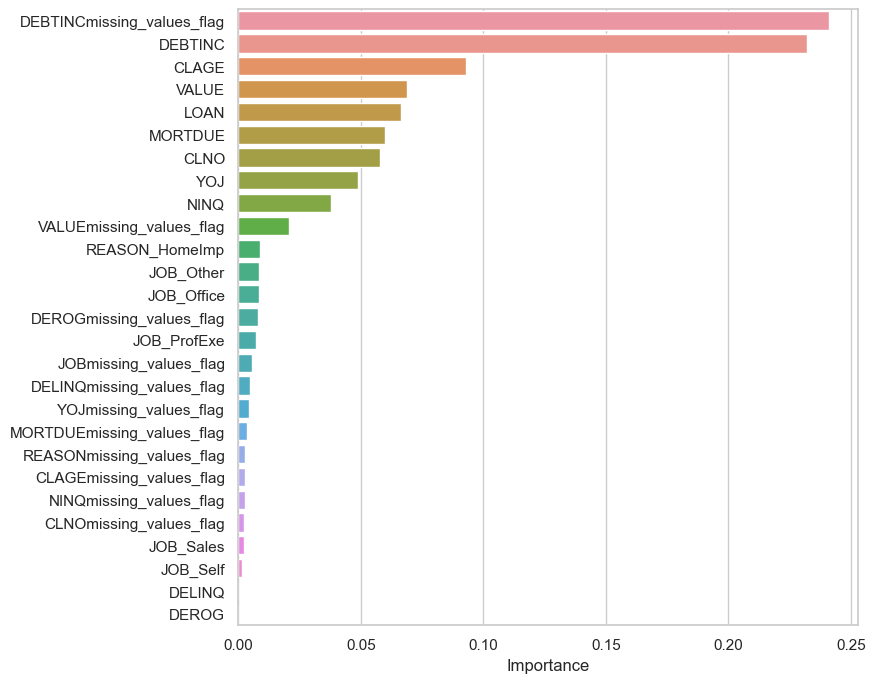

In [94]:
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**
* The feature importance plot for the random forest suggests that the DEBTINC_missing_values_flag followed by DEBTINC are the most important features. This is similar to the feature importance of the decision tree.
* Other important features are CLAGE, VALUE, LOAN, MORTDUE, and CLNO.

### Boosting Models

In [95]:
!pip install xgboost

In [96]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

In [97]:
adaboost_model = AdaBoostClassifier(random_state = 1)

adaboost_model.fit(X_train, y_train)

adaboost_model_perf_test = model_performance_classification(adaboost_model,X_test,y_test)

adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.855163,0.784696,0.888143


In [98]:
gbc = GradientBoostingClassifier(random_state = 1)

gbc.fit(X_train, y_train)

gbc_perf_test = model_performance_classification(gbc, X_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.852236,0.783989,0.887025


In [100]:
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

xgb.fit(X_train,y_train)

xgb_perf_test = model_performance_classification(xgb,X_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.865233,0.797852,0.894855


<AxesSubplot:xlabel='Importance'>

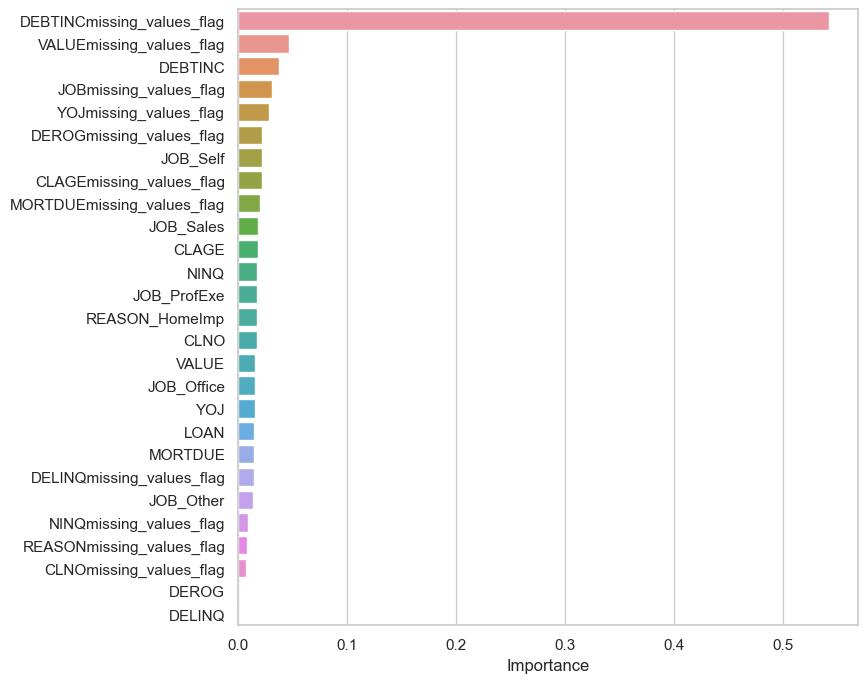

In [101]:
importances = xgb.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(importance_df.Importance, importance_df.index)

* Again we can see that the DEBTINC_missing_value has the weights the most on the prediction to default a loan. The other features are less important according to this model.

### KNN Test

In [102]:
knn = KNeighborsClassifier()

train_error = []
test_error = []
knn_many_split = {}
error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.30)
    
        knn.fit(x_train_new, y_train_new)
        
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
        test_error.append(1 - knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.23823216187433444],
 2: [0.1282191780821918, 0.18541001064962728],
 3: [0.12278538812785392, 0.20023961661341846],
 4: [0.1525228310502283, 0.18349307774227905],
 5: [0.1497260273972603, 0.18988285410010652],
 6: [0.1653538812785388, 0.18365282215122475],
 7: [0.16106164383561644, 0.18881789137380192],
 8: [0.16926940639269403, 0.18772630457933973],
 9: [0.16630136986301372, 0.1879392971246006],
 10: [0.17457762557077625, 0.1844515441959532],
 11: [0.1714840182648402, 0.18567625133120344],
 12: [0.1774200913242009, 0.18767305644302454],
 13: [0.17682648401826478, 0.18788604898828537],
 14: [0.17954337899543377, 0.1881789137380192]}

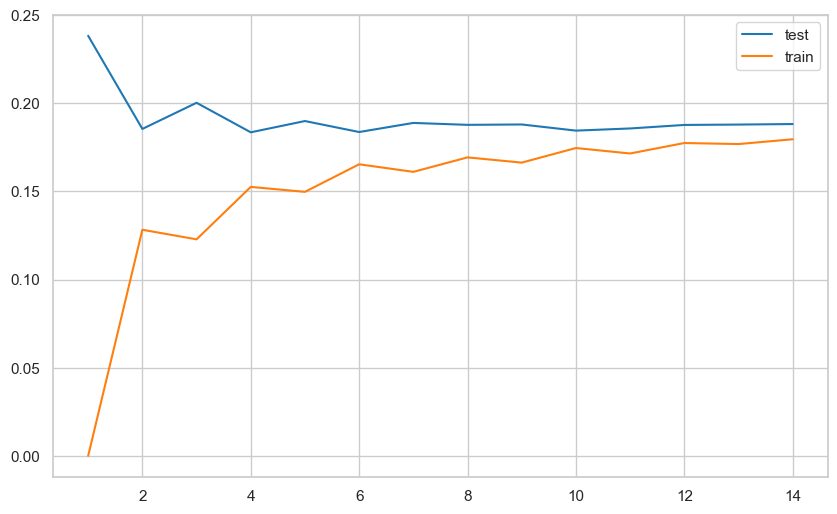

In [103]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observations:**
* We can see that the test error (error on the validation data) is more or less similar for K greater than or equal to 6. But the training error keeps increasing with increasing K.
* This implies that we would get a lower train and test error if we choose **K = 6.**
* So, let's fit the K-NN model with K=6 on the entire training set.

In [104]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [105]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3355
           1       0.84      0.22      0.35       817

    accuracy                           0.84      4172
   macro avg       0.84      0.61      0.63      4172
weighted avg       0.84      0.84      0.80      4172



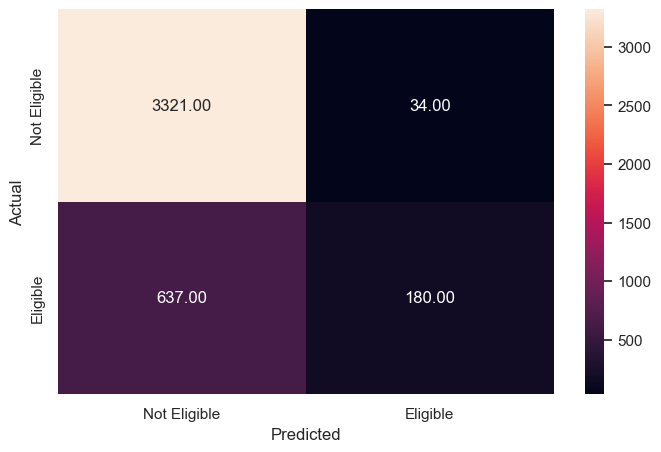

In [106]:
y_pred_train_knn = knn.predict(X_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1416
           1       0.76      0.16      0.26       372

    accuracy                           0.81      1788
   macro avg       0.79      0.57      0.58      1788
weighted avg       0.80      0.81      0.76      1788



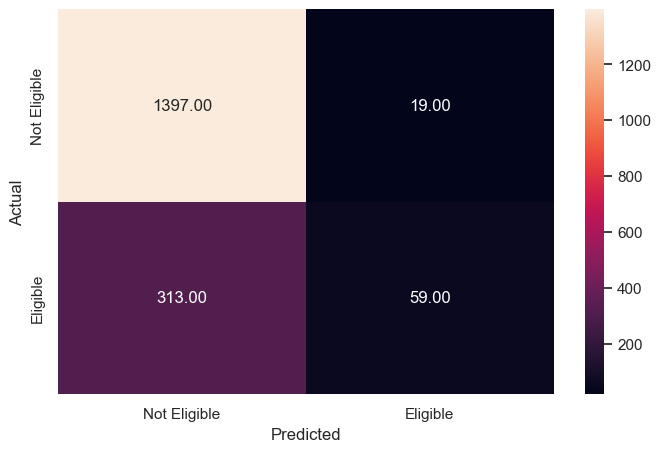

In [107]:
y_pred_test_knn = knn.predict(X_test)

metrics_score(y_test, y_pred_test_knn)

In [108]:
knn_test = model_performance_classification(knn, X_test, y_test)
knn_test

,Precision,Recall,Accuracy
0,0.786685,0.572592,0.814318


**Observations:**
* The model is not performing well
* The Recall score on the train and test sets are extremely low

In [109]:
params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(X_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


In [110]:
knn_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



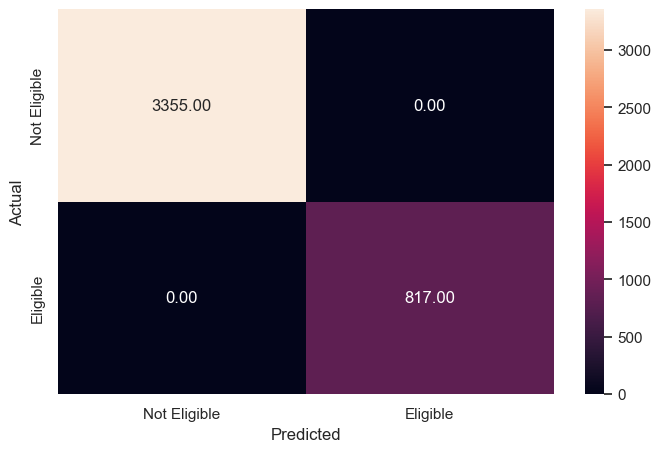

In [111]:
y_pred_train_knn_estimator = knn_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1416
           1       0.53      0.27      0.36       372

    accuracy                           0.80      1788
   macro avg       0.68      0.61      0.62      1788
weighted avg       0.77      0.80      0.77      1788



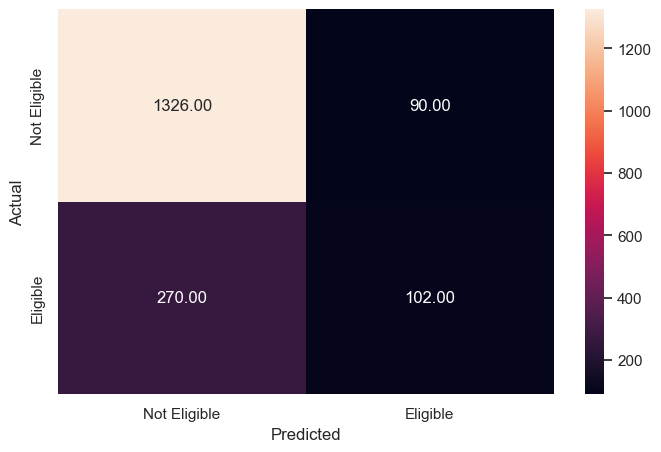

In [112]:
y_pred_test_knn_estimator = knn_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_knn_estimator)

In [113]:
knn_tuned_test = model_performance_classification(knn_estimator, X_test, y_test)
knn_tuned_test

,Precision,Recall,Accuracy
0,0.681039,0.605317,0.798658


**Observations:**
* The tuned model is overfitting the train data
* The recall and precision scores for the test data are low
* The tuned model is not performing well

### Comparing Model Performances

In [114]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] 
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall)  
    a.append(test_recall) 
      
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a 

In [115]:
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) 
    b.append(test_precision) 
      
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b 

In [116]:
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] 
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) 
    c.append(test_acc) 
    

    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c 

In [117]:
models_test_comp_df = pd.concat(
    
    [    
    lg_test.T, lg_6_test.T, lg_45_test.T, 
    d_tree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_balanced_test.T, rf_estimator_tuned_test.T,
    adaboost_model_perf_test.T, gbc_perf_test.T, xgb_perf_test.T, knn_test.T, knn_tuned_test.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Logistic regression model",
    "Logistic regression model using 0.6 threshold",
    "Logistic regression model using 0.45 threshold",
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Balanced Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "gbc classifier",
    "XGBoost classifier",
    "KNN",
    "Tuned KNN"
]

print("Test performance comparison:")

Test performance comparison:


In [118]:
models_test_comp_df.T

,Precision,Recall,Accuracy
Logistic regresstion model,0.584796,0.627893,0.606823
Logistic regresstion model using 0.6 treshold,0.584796,0.627893,0.606823
Logistic regresstion model using 0.45 treshold,0.584796,0.627893,0.606823
Decision Tree classifier,0.779942,0.757495,0.852908
Tuned Decision Tree classifier,0.795514,0.815872,0.866890
Random Forest classifier,0.860074,0.797783,0.893177
Balanced Random Forest classbifier,0.856855,0.782714,0.888143
Tuned Random Forest classifier,0.829884,0.838915,0.889262
Adaboost classifier,0.855163,0.784696,0.888143
gbc classifier,0.852236,0.783989,0.887025


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

* **Logistic Regression Model** gives coefficients for each input variable, indicating the direction and magnitude of their impact on predicted outcome 
    * <u>Tradeoff</u>:Does not give complex nonlinear relationship in the data, which limits its predictive performance.
    
    
* **Decision Tree Classifier** gives 100% score for the train dataset as it is overfitting the training data. The precision on the test data suggests that there's a 30%(1-0.7) chance that the model will predict that a loan will default even though it would not (False positive)
    * <u>Tradeoff</u>: Easily Overfitting data, poor generalization performance and decreased interpretability when the tree becomes too complex.


* **Random Forest** is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample a decision tree makes a prediction. 
    * <u>Tradeoff</u>:The results from all the decision trees are combined together and the final prediction is made using voting or averaging. Non-interpretable.


* **Balanced Random Forest** did not improve the model performance. It gives 100% score for all metrics on the training dataset and also overfitting the training data.
    * <u>Tradeoff</u>:Non-interpretable.


* **Hyper Tuned Random Forest** model has the best performance, giving high recall, precision, and accuracy on the test datasets. The model does not requires further tuning as it meets all the criteria required for the project.
    * <u>Tradeoff</u>:Non-interpretable.


* **XGBoost** has given good scores among other algorithms, but since we are focused on getting a high recall score the tuned Random Forest Classifier is a better fit.
    * <u>Tradeoff</u>: Can acheive high predictive performance, but its interpretability may be reduced as it involve multiple combinations of models.


* **Hyperparameter-tuned K-NN classifier** is overfitting on the training dataset and gives low recall on the testing datasets.
    * <u>Tradeoff</u>: When dealing with large dataset, KNN will not perform well in terms of predictive accuracy.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

The Debt-to-Income Ratio is the most impact feature in the chance to default on a loan.

* **Debt-to-income ratio** is the most important driver for defaulting or repaying a loan. The bank should consider this as a top feature to consider while processing a loan.


* The prominent feature that is the most impactful in the change to default on a loan is `DEBTINC_missing_values_flag` followed by `DEBTINC`. This emphasizes the impact of missing values on the prediction and should be communicated to the data entry team. A high debt-to-income ratio indicates that the applicant cannot afford his/hers monthly mortgage payments or defaulting on the loan. The bank should consider this as a top feature to consider while processing a loan request.


* The bank should consider `CLAGE`, `VALUE`, `LOAN`, `MORTDUE`, and `CLNO` as a set of features that have a high impact on defaulting on a loan.


* AGE of the oldest credit line in months is the feature that can positively affect loan default.


* Financial background is more relevant than JOB profile, the REASON for the loan, the actual amount of MORT, VALUE of the property, and the amount of LOAN was requested.


* The personal features like the employment profile and the loan reason request are good to have rather than must have, and therefore should not be the main focus when processing a loan application.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

**The best model is the tuned random forest model** which is giving an average of 84% recall for class 1 on the test data, 82% precision score, and 88% accuracy. These parameters are meeting the model evolution criteria that were defined in the beginning of the project.

* The model is effective and dose not requires any further tuning.
* The bank can use this model to predict their clients who are likely to default on their loans.

**The model is good enough to deploy in the production**

**Risk and challenges:**
* The major risk with this project is to underperform against the current and manual process.
* A big challenge will be changing the internal culture of the bank to adapt the new model to it.

## Executive Summary: 

**Key Findings in Milestone:**

* A decision tree model can predict loan defaulters 74% of the time they come to ask for a home loan.


* This model is highly interpretable


* Debt-to-income ratio is the most important driver for defaulting or repaying a loan. The bank should consider this as a top feature to consider while processing a loan, but also the one with the most missing data (21.3%) which is similar to the proportion of defaulted customers (20%)


* The bank should consider CLAGE, VALUE, LOAN, MORTDUE, and CLNO as a set of features that have a high impact on defaulting on a loan.


* It is recommendable to explore the possibility to create an alternative business process to manage and take decisions on those clients with no Debt/Income ratio available.

## Problem and solution summary:

* A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted.

* To do this, they will adopt the Equal Credit Opportunity Act guidelines to establish an empirically derived and statistically sound model for credit scoring.

* The model will be based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit.

* The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).

* There are 5 classification algorithms selected as the candidate for the model
    1. Logistic regression model
    2. Decision tree model
    3. Random forest tree
    4. Boosting models
    5. K-nearest neighbors

## Recommendations for implementation:

* **Best model:** Tuned Random Forest (Highest Recall)


* **Best performance metric that best fits the business objectives:** Recall and Accuracy


* Check the possibility to create an alternative business process to manage and take decisions on those clients with no Debt/Income ratio available.

* Explore other machine learning techniques such as engineering features, dropping columns, support vector machine, neural networks, among others.

* Create a pilot test with new model and compare the results with the current manual process before completing the transition to the new model.

* Check if there is a way to complete the missing values in the dataset.